<a href="https://colab.research.google.com/github/Soni-Test/Unsupervised-ML-Customer-Segmentation/blob/main/Final_Team_Notebook_Online_Retail_Customer_Segmentation_Capstone_4.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

#**<b><u> Project Title: Online Retail Customer Segmentation.</u></b>**

#**<b> Problem Description </b>**

### In this project, your task is to identify major customer segments on a transnational data set which contains all the transactions occurring between 01/12/2010 and 09/12/2011 for a UK-based and registered non-store online retail.The company mainly sells unique all-occasion gifts. Many customers of the company are wholesalers.

#**<b> Data Description </b>**

### <b>Attribute Information: </b>

* ### InvoiceNo: Invoice number. Nominal, a 6-digit integral number uniquely assigned to each transaction. If this code starts with letter 'c', it indicates a cancellation.
* ### StockCode: Product (item) code. Nominal, a 5-digit integral number uniquely assigned to each distinct product.
* ### Description: Product (item) name. Nominal.
* ### Quantity: The quantities of each product (item) per transaction. Numeric.
* ### InvoiceDate: Invice Date and time. Numeric, the day and time when each transaction was generated.
* ### UnitPrice: Unit price. Numeric, Product price per unit in sterling.
* ### CustomerID: Customer number. Nominal, a 5-digit integral number uniquely assigned to each customer.
* ### Country: Country name. Nominal, the name of the country where each customer resides.

In [ ]:
# mounting the drive
from google.colab import drive
drive.mount('/content/drive')

Mounted at /content/drive


# **Importing Library**

In [ ]:
# Importing the libraries
import numpy as np
import pandas as pd
from numpy import math
import seaborn as sns
from datetime import datetime

import warnings
from pylab import rcParams
%matplotlib inline
import matplotlib.pyplot as plt
import seaborn as sns; sns.set()
warnings.filterwarnings('ignore')

#**Loading Data**

In [ ]:
#load the dataset
retail_df = pd.read_excel("/content/drive/MyDrive/Project/Unsupervised (ML) Classification- Online Retail Customer Segmentation/Online Retail.xlsx")

In [ ]:
#shape of our dataset
print("The shape of our dataset is: ", retail_df.shape)

The shape of our dataset is:  (541909, 8)


In [ ]:
#check the head of the dataset
retail_df.head(10)

InvoiceNo StockCode                          Description  Quantity  \
0    536365    85123A   WHITE HANGING HEART T-LIGHT HOLDER         6   
1    536365     71053                  WHITE METAL LANTERN         6   
2    536365    84406B       CREAM CUPID HEARTS COAT HANGER         8   
3    536365    84029G  KNITTED UNION FLAG HOT WATER BOTTLE         6   
4    536365    84029E       RED WOOLLY HOTTIE WHITE HEART.         6   
5    536365     22752         SET 7 BABUSHKA NESTING BOXES         2   
6    536365     21730    GLASS STAR FROSTED T-LIGHT HOLDER         6   
7    536366     22633               HAND WARMER UNION JACK         6   
8    536366     22632            HAND WARMER RED POLKA DOT         6   
9    536367     84879        ASSORTED COLOUR BIRD ORNAMENT        32   

          InvoiceDate  UnitPrice  CustomerID         Country  
0 2010-12-01 08:26:00       2.55     17850.0  United Kingdom  
1 2010-12-01 08:26:00       3.39     17850.0  United Kingdom  
2 2010-12-01 08:26:00       2.75     17850.0  United Kingdom  
3 2010-12-01 08:26:00       3.39     17850.0  United Kingdom  
4 2010-12-01 08:26:00       3.39     17850.0  United Kingdom  
5 2010-12-01 08:26:00       7.65     17850.0  United Kingdom  
6 2010-12-01 08:26:00       4.25     17850.0  United Kingdom  
7 2010-12-01 08:28:00       1.85     17850.0  United Kingdom  
8 2010-12-01 08:28:00       1.85     17850.0  United Kingdom  
9 2010-12-01 08:34:00       1.69     13047.0  United Kingdom

In [ ]:
# Check the tail of the dataset
retail_df.tail(10)

InvoiceNo StockCode                      Description  Quantity  \
541899    581587     22726       ALARM CLOCK BAKELIKE GREEN         4   
541900    581587     22730       ALARM CLOCK BAKELIKE IVORY         4   
541901    581587     22367  CHILDRENS APRON SPACEBOY DESIGN         8   
541902    581587     22629              SPACEBOY LUNCH BOX         12   
541903    581587     23256      CHILDRENS CUTLERY SPACEBOY          4   
541904    581587     22613      PACK OF 20 SPACEBOY NAPKINS        12   
541905    581587     22899     CHILDREN'S APRON DOLLY GIRL          6   
541906    581587     23254    CHILDRENS CUTLERY DOLLY GIRL          4   
541907    581587     23255  CHILDRENS CUTLERY CIRCUS PARADE         4   
541908    581587     22138    BAKING SET 9 PIECE RETROSPOT          3   

               InvoiceDate  UnitPrice  CustomerID Country  
541899 2011-12-09 12:50:00       3.75     12680.0  France  
541900 2011-12-09 12:50:00       3.75     12680.0  France  
541901 2011-12-09 12:50:00       1.95     12680.0  France  
541902 2011-12-09 12:50:00       1.95     12680.0  France  
541903 2011-12-09 12:50:00       4.15     12680.0  France  
541904 2011-12-09 12:50:00       0.85     12680.0  France  
541905 2011-12-09 12:50:00       2.10     12680.0  France  
541906 2011-12-09 12:50:00       4.15     12680.0  France  
541907 2011-12-09 12:50:00       4.15     12680.0  France  
541908 2011-12-09 12:50:00       4.95     12680.0  France

#**Data inspection and analyzing data quality issue**

Let's explore our dataset first by getting more information about rows and columns.

In [ ]:
# Let's look brief information about columns and it's data type.
retail_df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 541909 entries, 0 to 541908
Data columns (total 8 columns):
 #   Column       Non-Null Count   Dtype         
---  ------       --------------   -----         
 0   InvoiceNo    541909 non-null  object        
 1   StockCode    541909 non-null  object        
 2   Description  540455 non-null  object        
 3   Quantity     541909 non-null  int64         
 4   InvoiceDate  541909 non-null  datetime64[ns]
 5   UnitPrice    541909 non-null  float64       
 6   CustomerID   406829 non-null  float64       
 7   Country      541909 non-null  object        
dtypes: datetime64[ns](1), float64(2), int64(1), object(4)
memory usage: 33.1+ MB


Our dataset is composed of **541909** rows and **8** columns. When going through the columns, we notice that we have some missing values in the **CustomerID** column, as it only has **406829** values. Also the column **Description** has missing values. So, that should be considered when applying exploration to our dataset.

In [ ]:
#exploring the unique values of each attribute
print("Number of transactions: ", retail_df['InvoiceNo'].nunique())
print("Number of products bought: ",retail_df['StockCode'].nunique())
print("Number of customers:", retail_df['CustomerID'].nunique() )
print("Percentage of customers NA: ", round(retail_df['CustomerID'].isnull().sum() * 100 / len(retail_df),2),"%" )
print('Number of countries: ',retail_df['Country'].nunique())

Number of transactions:  25900
Number of products bought:  4070
Number of customers: 4372
Percentage of customers NA:  24.93 %
Number of countries:  38


**Observation:** The number of NA customers is quite large and that would impact the results.

Now, let's have an idea about the quantitative data (Quantity & UnitPrice).

In [ ]:
# Looking into descriptive statistics of numerical features.
retail_df.describe([0.75,0.95,0.99])

Quantity      UnitPrice     CustomerID
count  541909.000000  541909.000000  406829.000000
mean        9.552250       4.611114   15287.690570
std       218.081158      96.759853    1713.600303
min    -80995.000000  -11062.060000   12346.000000
50%         3.000000       2.080000   15152.000000
75%        10.000000       4.130000   16791.000000
95%        29.000000       9.950000   17905.000000
99%       100.000000      18.000000   18212.000000
max     80995.000000   38970.000000   18287.000000

The first thing to notice is that we have some negative values in our dataset. Maybe, this could mean that these quantity was returned or cancelled. (Same for UnitPrice negative values). Another interseting things to notice here is that 99% value for unit price and quantity is very low while max value is very high. This is clearly outlier and the reason can be like a few precious items which is occasionally bought and also unit price and quantity are inversely releated to each other.

Number of unique items

In [ ]:
# Number of unique items
retail_df.StockCode.unique().shape

(4070,)

Description of items: We see that the descriptions are more then the stock code so there must be some stock code which have more than one decription

In [ ]:
# number of unique description
retail_df.Description.unique().shape

(4224,)

In [ ]:
# checking the attributes/columns data types
retail_df.dtypes

InvoiceNo              object
StockCode              object
Description            object
Quantity                int64
InvoiceDate    datetime64[ns]
UnitPrice             float64
CustomerID            float64
Country                object
dtype: object

In [ ]:
# filtering records for stockcode and it's description
cat_des_df = retail_df.groupby(["StockCode","Description"]).count().reset_index()

Stockcode which have more than one description

In [ ]:
# constructing table for stock code having more than one description
cat_des_df.StockCode.value_counts()[cat_des_df.StockCode.value_counts()>1].reset_index().head()

index  StockCode
0  20713          8
1  23084          7
2  21830          6
3  85175          6
4  85172          5

Example of one such stockcode

In [ ]:
# example of one such stockcode with more than one description
retail_df[retail_df['StockCode'] == cat_des_df.StockCode.value_counts()[cat_des_df.StockCode.value_counts()>1]
      .reset_index()['index'][6]]['Description'].unique()

array(['JUMBO BAG VINTAGE CHRISTMAS ', 'came coded as 20713',
       'wrongly coded 20713', '20713 wrongly marked', 20713], dtype=object)

##**Exploring Cancelled invoices**

As mentioned in the description of the dataset, some InvoiceNo start with the letter "c" = cancelled. Let's see if our hypothesis is correct about the negative quantity: **-80995**. <br>
We will look for the list of cancelled invoices and check if there is an invoice with that quantity.

In [ ]:
#get canceled transactions
cancelled_orders = retail_df[retail_df['InvoiceNo'].astype(str).str.contains('C')]
cancelled_orders.head()

InvoiceNo StockCode                       Description  Quantity  \
141   C536379         D                          Discount        -1   
154   C536383    35004C   SET OF 3 COLOURED  FLYING DUCKS        -1   
235   C536391     22556    PLASTERS IN TIN CIRCUS PARADE        -12   
236   C536391     21984  PACK OF 12 PINK PAISLEY TISSUES        -24   
237   C536391     21983  PACK OF 12 BLUE PAISLEY TISSUES        -24   

            InvoiceDate  UnitPrice  CustomerID         Country  
141 2010-12-01 09:41:00      27.50     14527.0  United Kingdom  
154 2010-12-01 09:49:00       4.65     15311.0  United Kingdom  
235 2010-12-01 10:24:00       1.65     17548.0  United Kingdom  
236 2010-12-01 10:24:00       0.29     17548.0  United Kingdom  
237 2010-12-01 10:24:00       0.29     17548.0  United Kingdom

In [ ]:
#search for transaction where quantity == -80995
cancelled_orders[cancelled_orders['Quantity']==-80995]

InvoiceNo StockCode                  Description  Quantity  \
540422   C581484     23843  PAPER CRAFT , LITTLE BIRDIE    -80995   

               InvoiceDate  UnitPrice  CustomerID         Country  
540422 2011-12-09 09:27:00       2.08     16446.0  United Kingdom

In [ ]:
cancelled_orders[cancelled_orders['Quantity']>0]

Empty DataFrame
Columns: [InvoiceNo, StockCode, Description, Quantity, InvoiceDate, UnitPrice, CustomerID, Country]
Index: []

As we expected, negative values in the Quantity column, mean that it's a cancelled quantity. <br>
**Now, let's see How much cancelled orders do we have in the dataset ?** 

In [ ]:
#check how many rows our dataframe of cancelled orders contain
print("We have ",len(cancelled_orders), " cancelled orders.")
#percentage of cancelled orders in total orders
total_orders = retail_df['InvoiceNo'].nunique()
cancelled_number = len(cancelled_orders)
print('Percentage of orders canceled: {}/{} ({:.2f}%) '.format(cancelled_number, total_orders, cancelled_number/total_orders*100))

We have  9288  cancelled orders.
Percentage of orders canceled: 9288/25900 (35.86%) 


**Observation:** We have a large percentage of cancelled orders of 35%. Studying these cancelled orders may help in preventing future cancellation.


##**Number of Orders cancelled from each country**

In [ ]:
# Number of Orders cancelled country wise
cancel_order_country = cancelled_orders.groupby('Country')['InvoiceNo'].count().reset_index()
cancel_order_country_top10 = cancel_order_country.sort_values('InvoiceNo',ascending=False, ignore_index=True).head(10)
cancel_order_country_top10

Country  InvoiceNo
0  United Kingdom       7856
1         Germany        453
2            EIRE        302
3          France        149
4             USA        112
5       Australia         74
6           Spain         48
7           Italy         45
8         Belgium         38
9           Japan         37

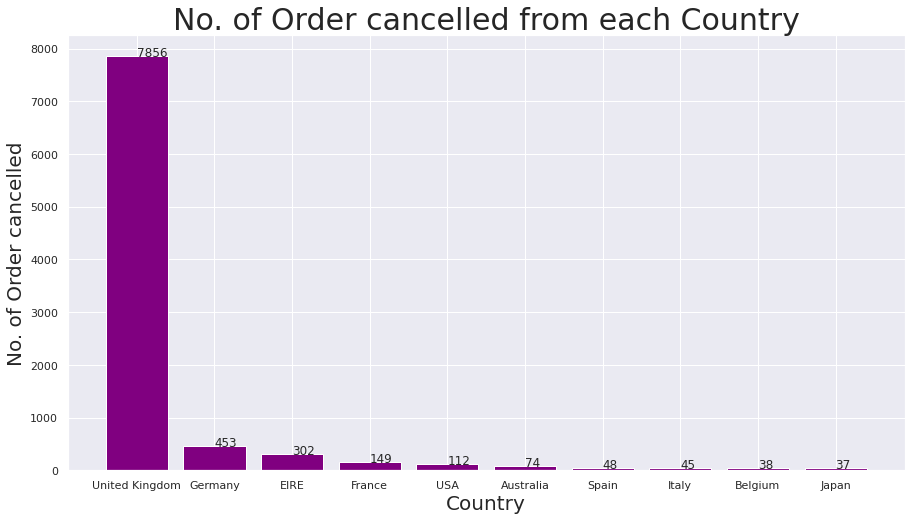

In [ ]:
# Figure Size
plt.figure(figsize=(15,8))

## Define x and y axis
x=cancel_order_country_top10['Country']
y=cancel_order_country_top10['InvoiceNo']

# creating the bar plot
plt.bar(x,y,color='purple')

## Function to set label
def addlabels(x,y):
    for i in range(len(x)):
        plt.text(i,y[i],y[i])

addlabels(x,y)

# set xlabel. ylabel and title
plt.xlabel("Country", size=20)
plt.ylabel("No. of Order cancelled", size=20)
plt.title("No. of Order cancelled from each Country", size=30)

## Showing the plot
plt.show()

##**What's the average number of orders per customer?**

In [ ]:
# get unique InvoiceNo number per customer
groupby_customers = pd.DataFrame(retail_df.groupby('CustomerID')['InvoiceNo'].nunique())
groupby_customers.head()

InvoiceNo
CustomerID           
12346.0             2
12347.0             7
12348.0             4
12349.0             1
12350.0             1

In [ ]:
# getting descriptive statistics
groupby_customers.describe()

InvoiceNo
count  4372.000000
mean      5.075480
std       9.338754
min       1.000000
25%       1.000000
50%       3.000000
75%       5.000000
max     248.000000

**Observation:** The average number of orders per customer  is 5.

As we found in descriptive statistics that customers buy in average (mean) a quantity of 10. Are they from the same product? Let's examine how many products are purchased.

##**What's the average number of unique items per order?**

In [ ]:
# filtering records for products number per invoiceNo
groupby_invoice = pd.DataFrame(retail_df.groupby('InvoiceNo')['StockCode'].nunique())
groupby_invoice.columns=['productsNumber']
groupby_invoice.head()

productsNumber
InvoiceNo                
536365                  7
536366                  2
536367                 12
536368                  4
536369                  1

In [ ]:
# getting descriptive statistics 
groupby_invoice.describe()

productsNumber
count    25900.000000
mean        20.510618
std         42.500488
min          1.000000
25%          2.000000
50%         10.000000
75%         23.000000
max       1110.000000

In [ ]:
# descriptive statistics for stockcode
retail_df.groupby(['InvoiceNo','CustomerID'])['StockCode'].nunique().describe()

count    22190.000000
mean        17.876566
std         22.872614
min          1.000000
25%          3.000000
50%         12.000000
75%         24.000000
max        541.000000
Name: StockCode, dtype: float64

## Explore by products per invoice

In the description of our dataframe, we found that 75% of customers buy a quantity of 10. Are they from the same product? Let's examine how many products are purchased.

In [ ]:
# records filtering 
temp_df =retail_df.groupby(['InvoiceNo','CustomerID'],as_index=False)['InvoiceDate'].count()
transaction_df = temp_df.rename(columns = {'InvoiceDate':'Number of products'})
transaction_df.head()

InvoiceNo  CustomerID  Number of products
0    536365     17850.0                   7
1    536366     17850.0                   2
2    536367     13047.0                  12
3    536368     13047.0                   4
4    536369     13047.0                   1

In [ ]:
# taking descriptive statistics
transaction_df.describe()

CustomerID  Number of products
count  22190.000000        22190.000000
mean   15238.498738           18.333889
std     1733.149624           23.892111
min    12346.000000            1.000000
25%    13755.000000            3.000000
50%    15136.000000           12.000000
75%    16746.000000           24.000000
max    18287.000000          542.000000

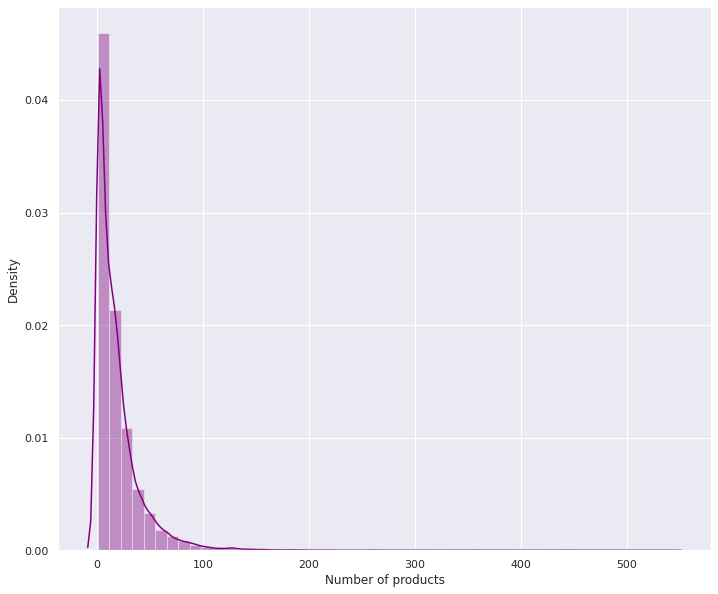

In [ ]:
# plotting distribution of number of products
fig, ax = plt.subplots()
fig.set_size_inches(11.7, 10)
sns.distplot(transaction_df['Number of products'],ax=ax, color='purple')
plt.show()

**We have a skewed distribution of products.** Most people buy less than 25 items.

#**Data Cleaning**

In [ ]:
# checking shape
retail_df.shape

(541909, 8)

###**Checking missing values**

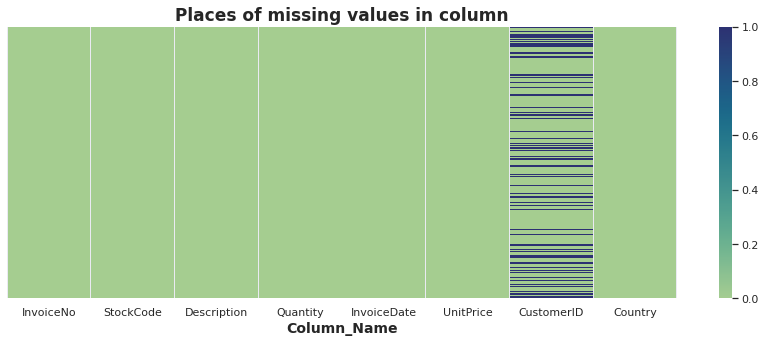

In [ ]:
# plotting heatmap for missing values 
plt.figure(figsize=(15, 5))
sns.heatmap(retail_df.isnull(), cbar=True, yticklabels=False, cmap="crest")
plt.xlabel("Column_Name", size=14, weight="bold")
plt.title("Places of missing values in column",fontweight="bold",size=17)
plt.show()

After looking into the null values, we can clearly see that the **ColumnID** of our dataset has the highest number of missing values. We will drop these missing values

In [ ]:
# Checking null value
retail_df.isnull().sum()

InvoiceNo           0
StockCode           0
Description      1454
Quantity            0
InvoiceDate         0
UnitPrice           0
CustomerID     135080
Country             0
dtype: int64

In [ ]:
# making copy of retail_df so that changes made in copied dataframe does not reflect in original dataframe
retail_df_copy=retail_df.copy()

###**Removing Cancelled order**

In [ ]:
#remove canceled orders
retail_df_copy = retail_df_copy[retail_df_copy['Quantity']>0]
retail_df_copy.shape

(531285, 8)

###**Removing NA values**

In [ ]:
#remove rows where customerID are NA
retail_df_copy.dropna(subset=['CustomerID'],how='all',inplace=True)
retail_df_copy.shape

(397924, 8)

In [ ]:
# Checking null value after removing NA values
retail_df_copy.isnull().sum()

InvoiceNo      0
StockCode      0
Description    0
Quantity       0
InvoiceDate    0
UnitPrice      0
CustomerID     0
Country        0
dtype: int64

###**Dropping Duplicates**

In [ ]:
# checking total duplicated values
retail_df.duplicated().sum()

5268

In [ ]:
# dropping ALL duplicte values
retail_df_copy.drop_duplicates(inplace=True)

In [ ]:
# Checking shape after cleaning
retail_df_copy.shape

(392732, 8)

In [ ]:
print("Summary..")
#exploring the unique values of each attribute
print("Number of transactions: ", retail_df_copy['InvoiceNo'].nunique())
print("Number of products bought: ",retail_df_copy['StockCode'].nunique())
print("Number of customers:", retail_df_copy['CustomerID'].nunique() )
print("Percentage of customers NA: ", round(retail_df_copy['CustomerID'].isnull().sum() * 100 / len(retail_df),2),"%" )

Summary..
Number of transactions:  18536
Number of products bought:  3665
Number of customers: 4339
Percentage of customers NA:  0.0 %


#**Exploratory Data Analysis (EDA)**

In [ ]:
# Creating new column total_cost
retail_df_copy['total_cost'] = retail_df_copy['Quantity'] * retail_df_copy['UnitPrice']

In [ ]:
# checking head
retail_df_copy.head()

InvoiceNo StockCode                          Description  Quantity  \
0    536365    85123A   WHITE HANGING HEART T-LIGHT HOLDER         6   
1    536365     71053                  WHITE METAL LANTERN         6   
2    536365    84406B       CREAM CUPID HEARTS COAT HANGER         8   
3    536365    84029G  KNITTED UNION FLAG HOT WATER BOTTLE         6   
4    536365    84029E       RED WOOLLY HOTTIE WHITE HEART.         6   

          InvoiceDate  UnitPrice  CustomerID         Country  total_cost  
0 2010-12-01 08:26:00       2.55     17850.0  United Kingdom       15.30  
1 2010-12-01 08:26:00       3.39     17850.0  United Kingdom       20.34  
2 2010-12-01 08:26:00       2.75     17850.0  United Kingdom       22.00  
3 2010-12-01 08:26:00       3.39     17850.0  United Kingdom       20.34  
4 2010-12-01 08:26:00       3.39     17850.0  United Kingdom       20.34

##**What's the total revenue per country & Customers by country?**

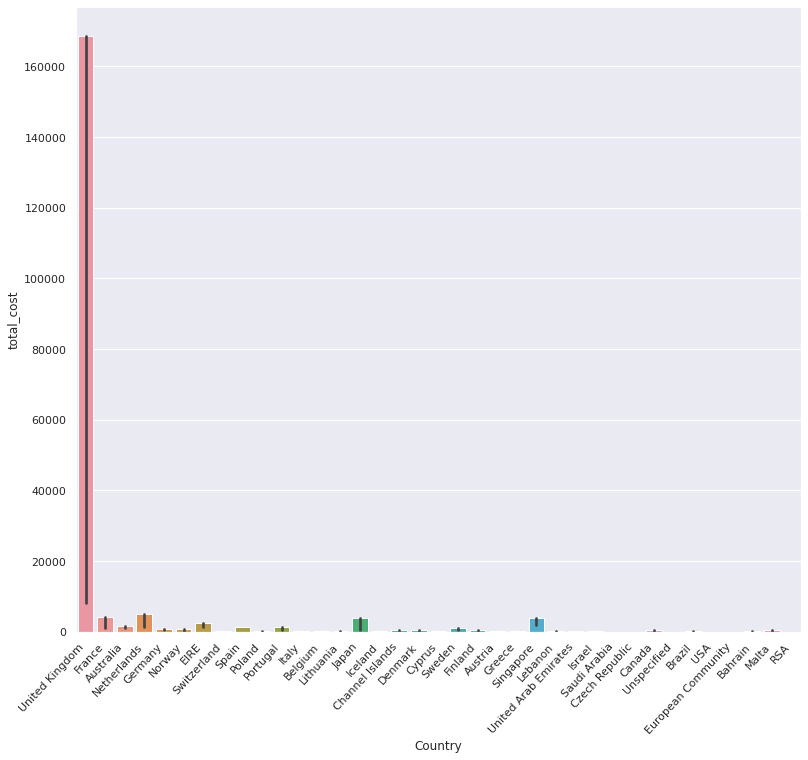

In [ ]:
# Plotting barchart for revenue generated across different country
import seaborn as sns
import matplotlib.pyplot as plt
%matplotlib inline
fig, ax = plt.subplots()
fig.set_size_inches(13, 11.5)
ax=sns.barplot(x='Country', y='total_cost',data=retail_df_copy,estimator=max,ax=ax)
ax.set_xticklabels(ax.get_xticklabels(), rotation=47, ha="right")
plt.show()


In [ ]:
# total revenue per country
retail_df_copy.groupby('Country').sum().sort_values(by='total_cost', ascending=False)

Quantity    UnitPrice    CustomerID   total_cost
Country                                                               
United Kingdom         4254037  1037945.864  5.429898e+09  7285024.644
Netherlands             200937     6247.730  3.407895e+07   285446.340
EIRE                    140383    32134.960  1.065794e+08   265262.460
Germany                 119156    33499.580  1.141791e+08   228678.400
France                  111429    36788.980  1.055687e+08   208934.310
Australia                84199     3605.750  1.474610e+07   138453.810
Spain                    27944     9492.390  3.201771e+07    61558.560
Switzerland              30083     6389.270  2.332474e+07    56443.950
Belgium                  23237     7372.850  2.524670e+07    41196.340
Sweden                   36078     1693.690  6.624864e+06    38367.830
Japan                    26016      657.210  4.095425e+06    37416.370
Norway                   19338     5662.470  1.333461e+07    36165.440
Portugal                 16095     8636.430  1.851992e+07    33375.840
Finland                  10704     3628.440  8.574309e+06    22546.080
Singapore                 5241    12949.990  2.829168e+06    21279.290
Channel Islands           9485     3388.000  1.112340e+07    20440.540
Denmark                   8235     1195.550  4.757518e+06    18955.340
Italy                     8112     3576.210  9.588028e+06    17483.240
Cyprus                    6340     3466.150  7.480720e+06    13502.850
Austria                   4881     1693.900  4.982601e+06    10198.680
Poland                    3684     1377.210  4.201606e+06     7334.650
Israel                    4043      898.590  3.101599e+06     7215.840
Greece                    1557      663.290  1.995867e+06     4760.520
Iceland                   2458      481.210  2.247154e+06     4310.000
Canada                    2763      910.580  2.615483e+06     3666.380
USA                       2458      413.300  2.260641e+06     3580.390
Malta                      970      545.190  1.891076e+06     2725.590
Unspecified               1785      775.950  3.309817e+06     2660.770
United Arab Emirates       982      229.890  1.018952e+06     1902.280
Lebanon                    386      242.440  5.743800e+05     1693.880
Lithuania                  652       99.440  5.366200e+05     1661.060
European Community         499      289.800  9.064800e+05     1300.250
Brazil                     356      142.600  4.086080e+05     1143.600
RSA                        352      248.100  7.218680e+05     1002.310
Czech Republic             671       78.270  3.195250e+05      826.740
Bahrain                    260       78.950  2.100270e+05      548.400
Saudi Arabia                80       21.160  1.130850e+05      145.920

**Observation:** we can see that the largest market is the one located in UK.

In [ ]:
# filtering records for UK
retail_df_copy[retail_df_copy['Country']=='United Kingdom']['CustomerID'].nunique()

3921

**Insights:** So, we can conclude not only most sales revenues are achieved in the UK, but also most customers are located there too. We can explore this to find more about what products the customers buy together and what possible future opportunities in the UK Market.

In [ ]:
# getting descriptive statistics for largest market i.e, UK
retail_uk = retail_df_copy[retail_df_copy['Country']=='United Kingdom']
retail_uk.describe()

Quantity      UnitPrice     CustomerID     total_cost
count  349227.000000  349227.000000  349227.000000  349227.000000
mean       12.181295       2.972124   15548.333625      20.860428
std       191.797470      17.990307    1594.403077     328.406035
min         1.000000       0.000000   12346.000000       0.000000
25%         2.000000       1.250000   14191.000000       4.200000
50%         4.000000       1.950000   15518.000000      10.200000
75%        12.000000       3.750000   16931.000000      17.850000
max     80995.000000    8142.750000   18287.000000  168469.600000

In [ ]:
# Checking unique summary for UK market
print("Number of transactions: ", retail_uk['InvoiceNo'].nunique())
print("Number of products bought: ",retail_uk['StockCode'].nunique())
print("Number of customers:", retail_uk['CustomerID'].nunique() )
print("Percentage of customers NA: ", round(retail_uk['CustomerID'].isnull().sum() * 100 / len(retail_uk),2),"%" )
print('Number of countries: ',retail_uk['Country'].nunique())

Number of transactions:  16649
Number of products bought:  3645
Number of customers: 3921
Percentage of customers NA:  0.0 %
Number of countries:  1


##**Top Customers**

In [ ]:
top_customers = pd.DataFrame(retail_df_copy['CustomerID'].value_counts().sort_values(ascending = False).reset_index())
top_customers.rename(columns = {'index':'CustomerID','CustomerID':'count'},inplace = True)
top_customers.head(5)

CustomerID  count
0     17841.0   7676
1     14911.0   5672
2     14096.0   5111
3     12748.0   4413
4     14606.0   2677

Text(0.5, 1.0, "Top 5 Cusotmer's ID.")

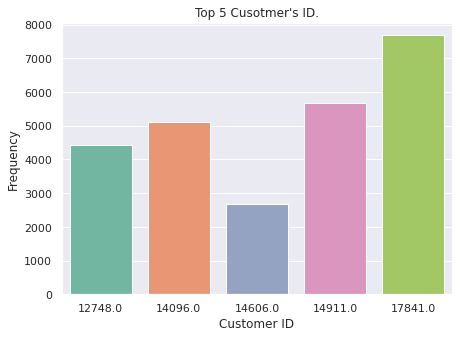

In [ ]:
# Plotting top five customers 
plt.figure(figsize = (7,5))
sns.barplot(x = 'CustomerID',y = 'count',palette= 'Set2',data = top_customers[:5])
plt.xlabel('Customer ID')
plt.ylabel('Frequency')
plt.title("Top 5 Cusotmer's ID.")

##**Customer distribution over period of 1 year**

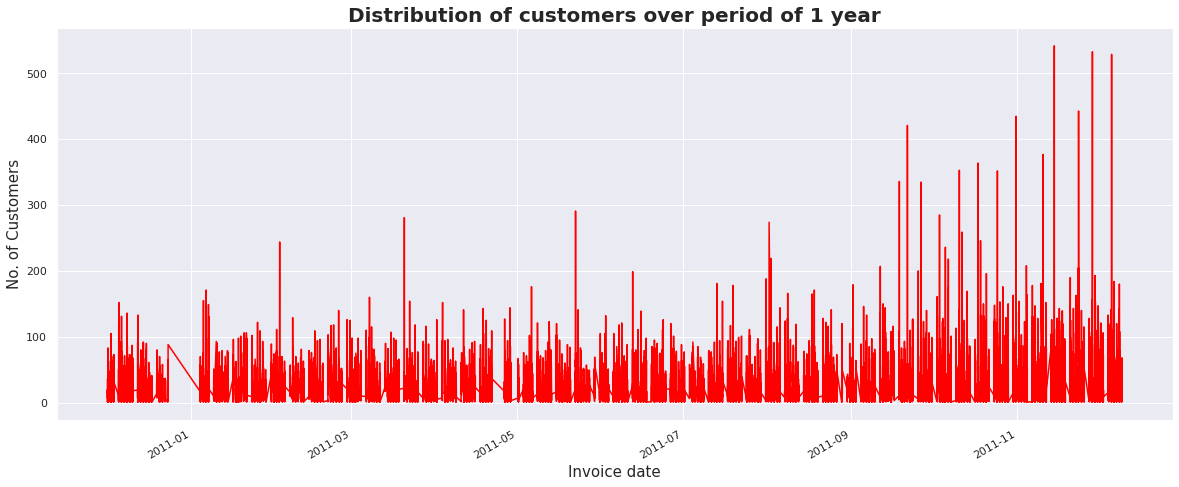

In [ ]:
# customer distribution in 1 year time period
plt.figure(figsize=(20,8))
customer_distribution = retail_df_copy.groupby('InvoiceDate').count()['CustomerID'].plot(color='red')

# Set title and x, y labels
plt.title('Distribution of customers over period of 1 year', size=20, fontweight='bold')
plt.xlabel('Invoice date', size=15)
plt.ylabel('No. of Customers', size=15)
plt.show()

##**Percentage of order from each country**

In [ ]:
# Unique country list
retail_df_copy['Country'].unique()

array(['United Kingdom', 'France', 'Australia', 'Netherlands', 'Germany',
       'Norway', 'EIRE', 'Switzerland', 'Spain', 'Poland', 'Portugal',
       'Italy', 'Belgium', 'Lithuania', 'Japan', 'Iceland',
       'Channel Islands', 'Denmark', 'Cyprus', 'Sweden', 'Finland',
       'Austria', 'Greece', 'Singapore', 'Lebanon',
       'United Arab Emirates', 'Israel', 'Saudi Arabia', 'Czech Republic',
       'Canada', 'Unspecified', 'Brazil', 'USA', 'European Community',
       'Bahrain', 'Malta', 'RSA'], dtype=object)

In [ ]:
# transaction count across all different country
retail_df_copy['Country'].value_counts()

United Kingdom          349227
Germany                   9027
France                    8327
EIRE                      7228
Spain                     2480
Netherlands               2363
Belgium                   2031
Switzerland               1842
Portugal                  1453
Australia                 1184
Norway                    1072
Italy                      758
Channel Islands            747
Finland                    685
Cyprus                     603
Sweden                     450
Austria                    398
Denmark                    380
Poland                     330
Japan                      321
Israel                     245
Unspecified                241
Singapore                  222
Iceland                    182
USA                        179
Canada                     151
Greece                     145
Malta                      112
United Arab Emirates        68
European Community          60
RSA                         58
Lebanon                     45
Lithuani

In [ ]:
# perecentage of order across different country
top_countries = pd.DataFrame(retail_df_copy['Country'].value_counts().sort_values(ascending = False).reset_index())
top_countries['Country %']= top_countries['Country']*100/retail_df_copy['Country'].count()
top_countries.rename(columns = {'index':'Country','Country':'Total Counts'},inplace = True)
top_countries.head()

Country  Total Counts  Country %
0  United Kingdom        349227  88.922471
1         Germany          9027   2.298514
2          France          8327   2.120275
3            EIRE          7228   1.840441
4           Spain          2480   0.631474

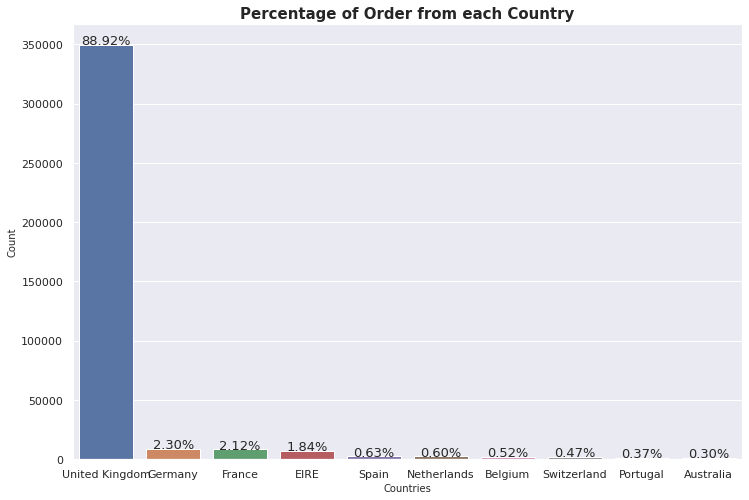

In [ ]:
# plotting percentage of Order from each country
fig, ax = plt.subplots(figsize = (12,8))
splot = sns.barplot(x='Country',y='Total Counts',data = top_countries[:10])
plt.title('Percentage of Order from each Country', size = 15, fontweight ='bold')
plt.xlabel('Countries', size = 10)
plt.ylabel('Count', size = 10)
for p in splot.patches:                              
    height = p.get_height()
    splot.text(p.get_x()+p.get_width()/2, height+500, '{:1.2f}''%'.format(height/retail_df_copy.shape[0]*100),ha = "center", size = 13)

**Key Observation:** 
* 88.92% customers are from United Kingdom.
* 2.30%, 2.12%, 1.84% and 0.63% customers are from Germany, France, Eire and Spain respectively.
* Remaining customers belong to other coutries like Netherlands, Belgium, Switzerland, Portugal, and Australia.

##**Top Selling products**

In [ ]:
# Top 5 selling products
Description_df=retail_df_copy['Description'].value_counts().reset_index()
Description_df.rename(columns={'index': 'Description_Name'}, inplace=True)
Description_df.rename(columns={'Description': 'Count'}, inplace=True)
Description_df.head()

Description_Name  Count
0  WHITE HANGING HEART T-LIGHT HOLDER   2016
1            REGENCY CAKESTAND 3 TIER   1714
2             JUMBO BAG RED RETROSPOT   1615
3       ASSORTED COLOUR BIRD ORNAMENT   1395
4                       PARTY BUNTING   1390

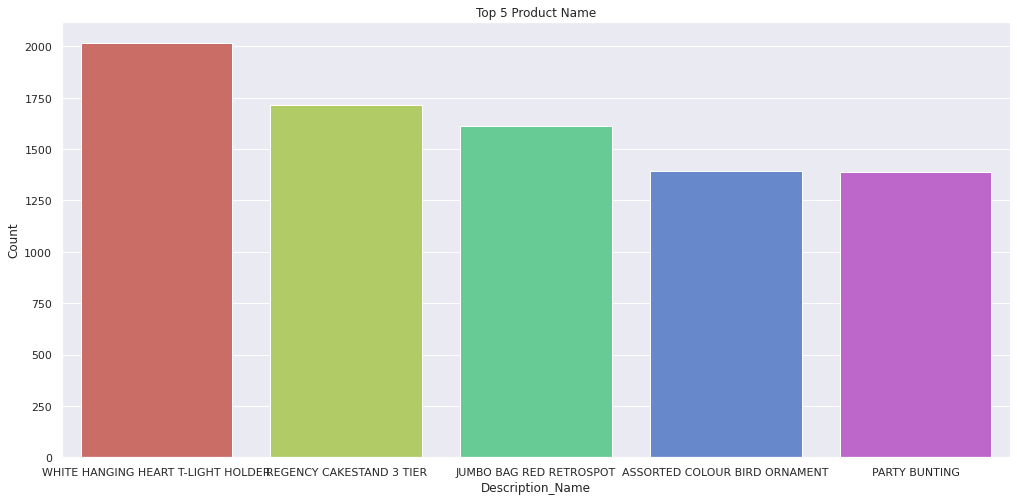

In [ ]:
# Plotting of top selling products
plt.figure(figsize=(17,8))
plt.title('Top 5 Product Name')
sns.barplot(x='Description_Name',y='Count',data=Description_df[:5],color = 'blue', palette = 'hls')
sns.set_style('white')

##**Least selling products**

In [ ]:
# Bottom 5 selling products
Description_df.tail()

Description_Name  Count
3872         GREEN WITH METAL BAG CHARM      1
3873         WHITE WITH METAL BAG CHARM      1
3874  BLUE/NAT SHELL NECKLACE W PENDANT      1
3875            PINK EASTER HENS+FLOWER      1
3876        PAPER CRAFT , LITTLE BIRDIE      1

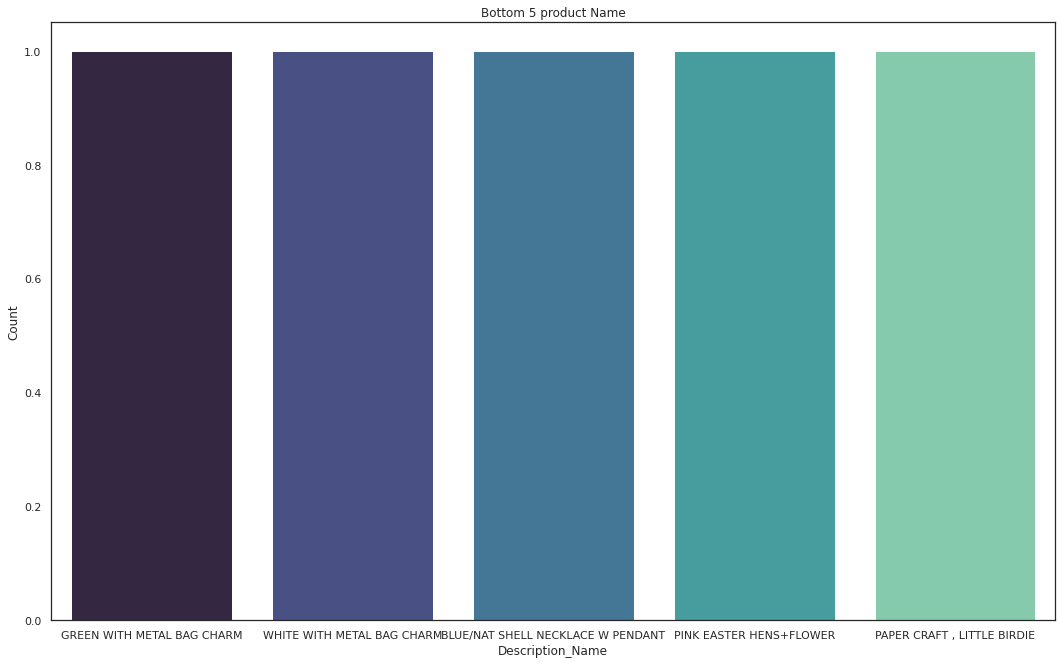

In [ ]:
# Plotting of bottom 5 selling products
plt.figure(figsize=(18,11))
plt.title('Bottom 5 product Name')
sns.barplot(x='Description_Name',y='Count',data=Description_df[-5:],palette="mako")

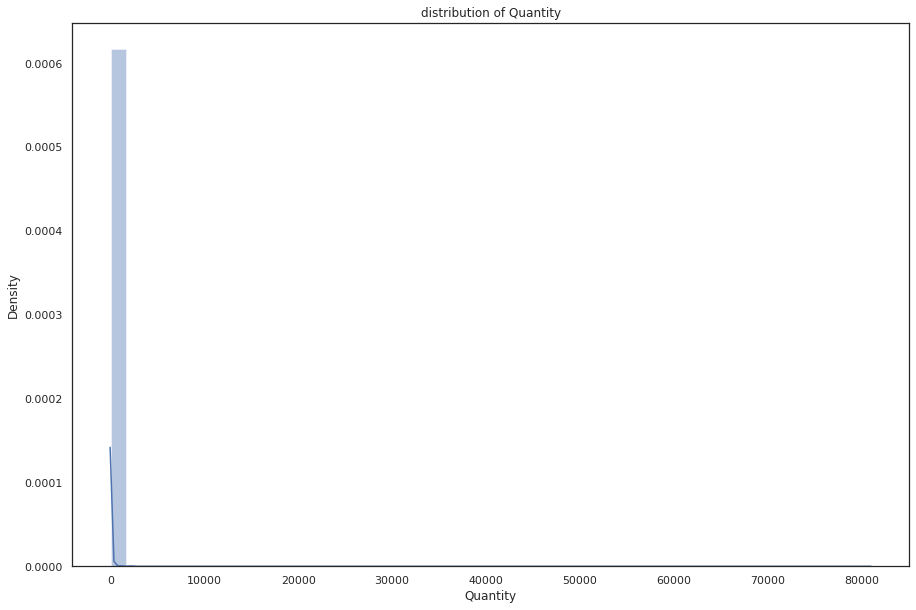

In [ ]:
#distribution of Quantity
plt.figure(figsize=(15,10))
plt.title('distribution of Quantity')
sns.distplot(retail_df_copy['Quantity'],color="B")

Here, we can see that we have very high positively skewed distribution of quantity. So, we will use log to remove skewness.

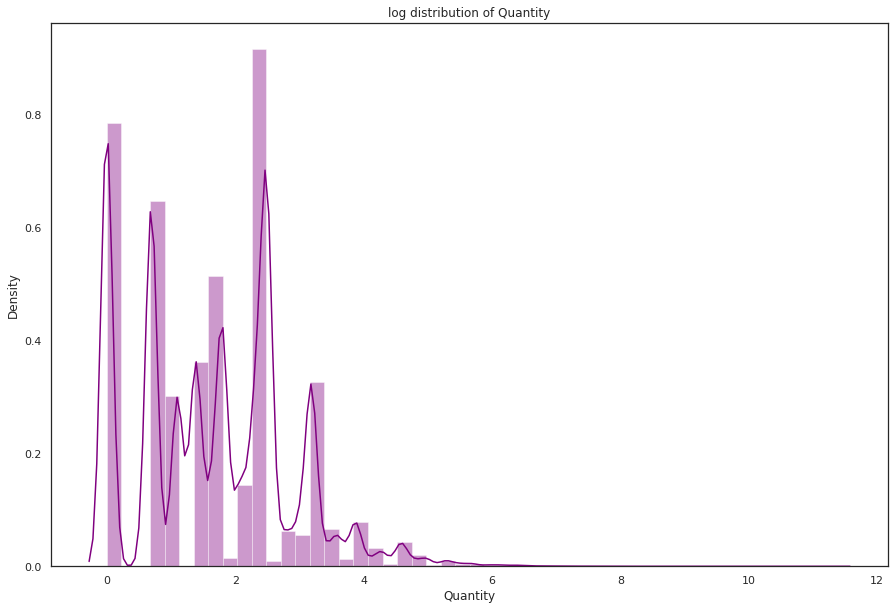

In [ ]:
# plotting log distribution of quantity
plt.figure(figsize=(15,10))
plt.title('log distribution of Quantity')
sns.distplot(np.log(retail_df_copy['Quantity']),color="purple")

In [ ]:
retail_df_copy.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 392732 entries, 0 to 541908
Data columns (total 9 columns):
 #   Column       Non-Null Count   Dtype         
---  ------       --------------   -----         
 0   InvoiceNo    392732 non-null  object        
 1   StockCode    392732 non-null  object        
 2   Description  392732 non-null  object        
 3   Quantity     392732 non-null  int64         
 4   InvoiceDate  392732 non-null  datetime64[ns]
 5   UnitPrice    392732 non-null  float64       
 6   CustomerID   392732 non-null  float64       
 7   Country      392732 non-null  object        
 8   total_cost   392732 non-null  float64       
dtypes: datetime64[ns](1), float64(3), int64(1), object(4)
memory usage: 38.0+ MB


#**Feature engineering**

###**Convert InvoiceDate columns into date time format**

In [ ]:
# Converting Invoice Date into data time format
retail_df_copy["InvoiceDate"] = pd.to_datetime(retail_df_copy["InvoiceDate"], format="%Y-%m-%d %H:%M:%S")

###**Create a new features Day from Invoicedate**

In [ ]:
# Creating new feature Day from Invoicedate
retail_df_copy['Day']=retail_df_copy['InvoiceDate'].dt.day_name()

###**Create some new features from Invoicedate like hours,year,month_num,day_num**

In [ ]:
# Creating some new features from Invoicedate like hours,year,month_num,day_num, month_name
retail_df_copy["year"] = retail_df_copy["InvoiceDate"].apply(lambda x: x.year)
retail_df_copy["month_num"] = retail_df_copy["InvoiceDate"].apply(lambda x: x.month)
retail_df_copy["day_num"] = retail_df_copy["InvoiceDate"].apply(lambda x: x.day)
retail_df_copy["hour"] = retail_df_copy["InvoiceDate"].apply(lambda x: x.hour)
retail_df_copy["minute"] = retail_df_copy["InvoiceDate"].apply(lambda x: x.minute)

In [ ]:
retail_df_copy['Month']=retail_df_copy['InvoiceDate'].dt.month_name()

In [ ]:
# checking head of dataset after extracting some new features from existing features
retail_df_copy.head().T

0                    1  \
InvoiceNo                                536365               536365   
StockCode                                85123A                71053   
Description  WHITE HANGING HEART T-LIGHT HOLDER  WHITE METAL LANTERN   
Quantity                                      6                    6   
InvoiceDate                 2010-12-01 08:26:00  2010-12-01 08:26:00   
UnitPrice                                  2.55                 3.39   
CustomerID                              17850.0              17850.0   
Country                          United Kingdom       United Kingdom   
total_cost                                 15.3                20.34   
Day                                   Wednesday            Wednesday   
year                                       2010                 2010   
month_num                                    12                   12   
day_num                                       1                    1   
hour                                          8                    8   
minute                                       26                   26   
Month                                  December             December   

                                          2  \
InvoiceNo                            536365   
StockCode                            84406B   
Description  CREAM CUPID HEARTS COAT HANGER   
Quantity                                  8   
InvoiceDate             2010-12-01 08:26:00   
UnitPrice                              2.75   
CustomerID                          17850.0   
Country                      United Kingdom   
total_cost                             22.0   
Day                               Wednesday   
year                                   2010   
month_num                                12   
day_num                                   1   
hour                                      8   
minute                                   26   
Month                              December   

                                               3  \
InvoiceNo                                 536365   
StockCode                                 84029G   
Description  KNITTED UNION FLAG HOT WATER BOTTLE   
Quantity                                       6   
InvoiceDate                  2010-12-01 08:26:00   
UnitPrice                                   3.39   
CustomerID                               17850.0   
Country                           United Kingdom   
total_cost                                 20.34   
Day                                    Wednesday   
year                                        2010   
month_num                                     12   
day_num                                        1   
hour                                           8   
minute                                        26   
Month                                   December   

                                          4  
InvoiceNo                            536365  
StockCode                            84029E  
Description  RED WOOLLY HOTTIE WHITE HEART.  
Quantity                                  6  
InvoiceDate             2010-12-01 08:26:00  
UnitPrice                              3.39  
CustomerID                          17850.0  
Country                      United Kingdom  
total_cost                            20.34  
Day                               Wednesday  
year                                   2010  
month_num                                12  
day_num                                   1  
hour                                      8  
minute                                   26  
Month                              December

In [ ]:
# checking shape after creating some new features
retail_df_copy.shape

(392732, 16)

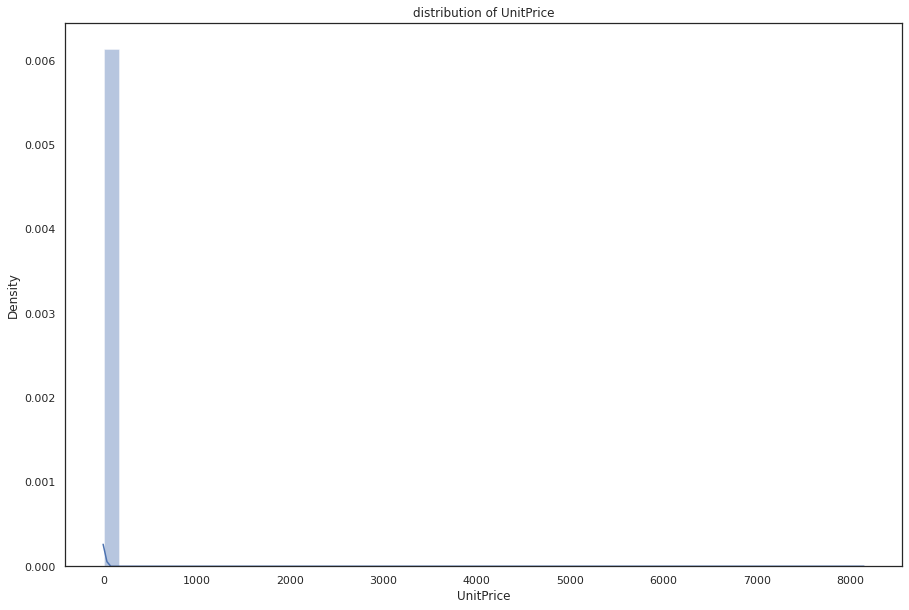

In [ ]:
# checking distribution of unit price
plt.figure(figsize=(15,10))
plt.title('distribution of UnitPrice')
sns.distplot(retail_df_copy['UnitPrice'],color="B")

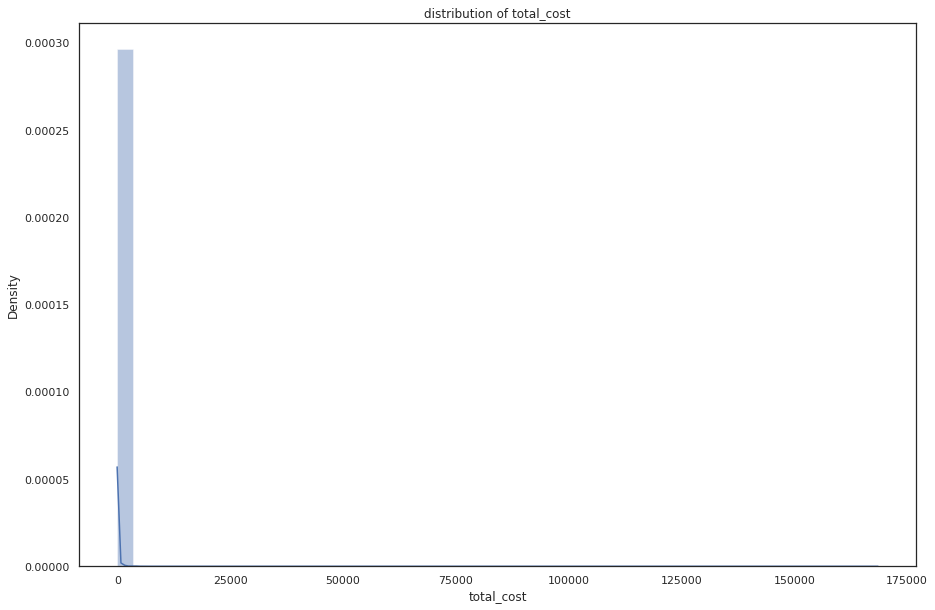

In [ ]:
# checking distribution of total_cost
plt.figure(figsize=(15,10))
plt.title('distribution of total_cost')
sns.distplot(retail_df_copy['total_cost'],color="B")

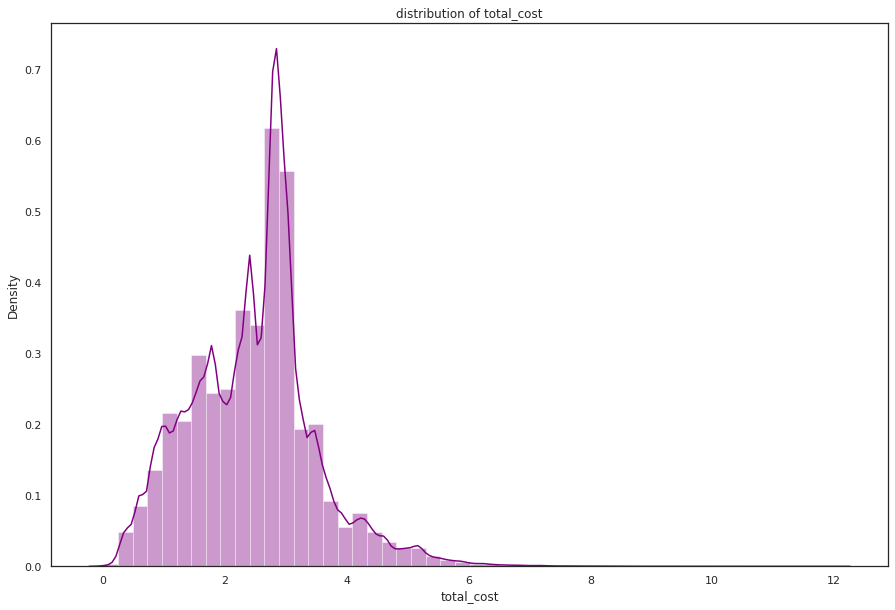

In [ ]:
# checking distribution of total_Cost after log transformation
plt.figure(figsize=(15,10))
plt.title('distribution of total_cost')
sns.distplot(np.log1p(retail_df_copy['total_cost']),color="purple")

We have got normal distribution of total_Cost after log transformation. total_cost is the product of unit price and quantity. Before we saw that both unit price and quantity are highly positively skewed but total cost after log transformation is normally distributed because unit price and quantity are inversely proportional.

In [ ]:
retail_df_copy=retail_df_copy[retail_df_copy['UnitPrice']>0]

In [ ]:
# getting descriptive statistics for total_cost
retail_df_copy['total_cost'].describe()

count    392692.000000
mean         22.631500
std         311.099224
min           0.001000
25%           4.950000
50%          12.450000
75%          19.800000
max      168469.600000
Name: total_cost, dtype: float64

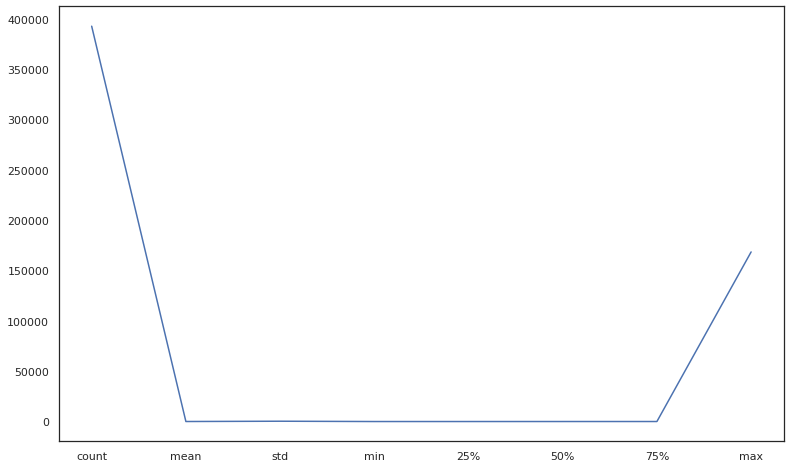

In [ ]:
# plotting descriptive statistics for total_Cost column
plt.figure(figsize=(13,8))
retail_df_copy['total_cost'].describe().plot()

##**Purchasing on different days**

In [ ]:
# making table for purchasing bu customer across different day of a week
day_df=retail_df_copy['Day'].value_counts().reset_index()
day_df.rename(columns={'index': 'Day_Name'}, inplace=True)
day_df.rename(columns={'Day': 'Count'}, inplace=True)
day_df

Day_Name  Count
0   Thursday  79243
1  Wednesday  68040
2    Tuesday  65744
3     Monday  64231
4     Sunday  61212
5     Friday  54222

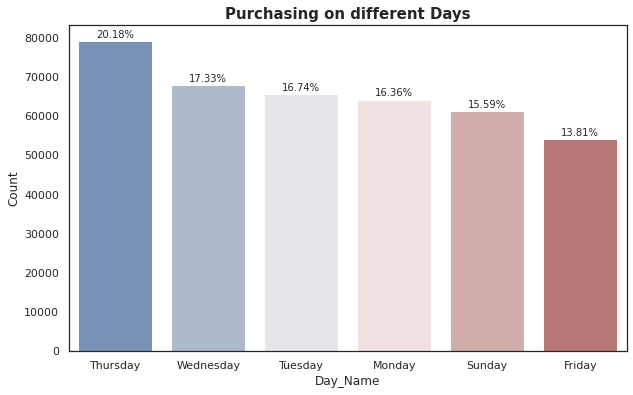

In [ ]:
# Plooting plot to show Purchasings by customers on different days of the week.
fig, ax = plt.subplots(figsize = (10,6))
sns.barplot(x = 'Day_Name',y = 'Count',data =day_df,palette="vlag")
plt.xlabel('Day_Name')
plt.ylabel('Count')
plt.title("Purchasing on different Days",fontweight='bold',size=15)

for p in ax.patches:                               
    height = p.get_height()
    ax.text(p.get_x()+p.get_width()/2, height+800, '{:1.2f}''%'.format(height/retail_df_copy.shape[0]*100),ha = "center", size = 10)

##**Purchasing on different months**

In [ ]:
# making table for pruchasing across different months of the year 
month_df=retail_df_copy['Month'].value_counts().reset_index()
month_df.rename(columns={'index': 'Month_Name'}, inplace=True)
month_df.rename(columns={'Month': 'Count'}, inplace=True)
month_df

Month_Name  Count
0    November  63168
1     October  48793
2    December  42696
3   September  39669
4         May  28073
5        June  26926
6       March  26870
7      August  26790
8        July  26580
9       April  22433
10    January  20988
11   February  19706

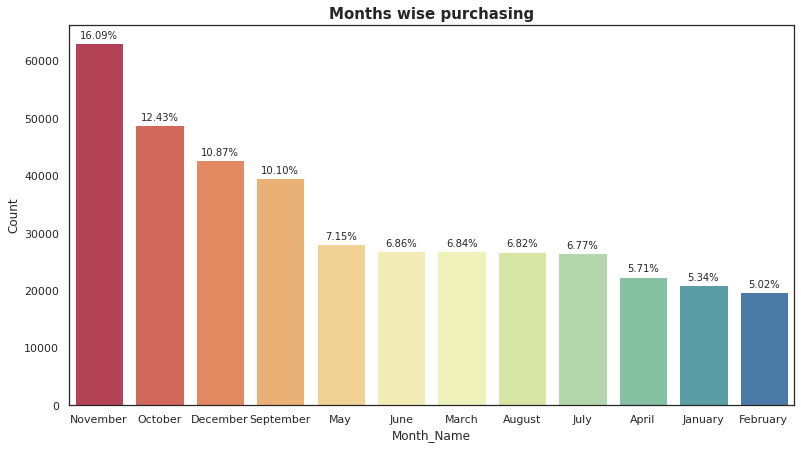

In [ ]:
# Plotting customers' purchasing in different Months of a year. 
fig, ax = plt.subplots(figsize = (13,7))
sns.barplot(x = 'Month_Name',y = 'Count',palette= 'Spectral',data = month_df)
plt.xlabel('Month_Name')
plt.ylabel('Count')
plt.title("Months wise purchasing", fontweight='bold',size=15)

for p in ax.patches:                               
    height = p.get_height()
    ax.text(p.get_x()+p.get_width()/2, height+800, '{:1.2f}''%'.format(height/retail_df_copy.shape[0]*100),ha = "center", size = 10)

##**Transaction across different hours of day**

In [ ]:
# transaction count across different hours of day
hour_df=retail_df_copy['hour'].value_counts().reset_index()
hour_df.rename(columns={'index': 'Hour_Name'}, inplace=True)
hour_df.rename(columns={'hour': 'Count'}, inplace=True)
hour_df

Hour_Name  Count
0          12  70938
1          13  63019
2          14  53251
3          11  48365
4          15  44790
5          10  37773
6          16  23715
7           9  21927
8          17  12941
9           8   8687
10         19   3233
11         18   2895
12         20    778
13          7    379
14          6      1

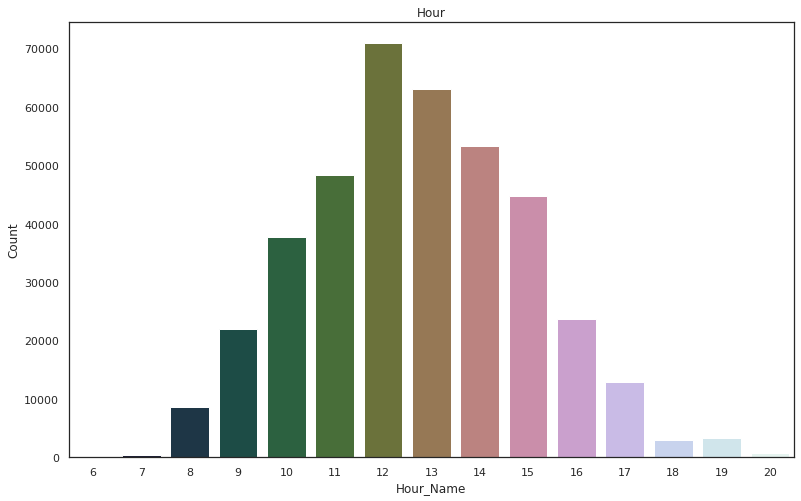

In [ ]:
# plotting count of transaction V/S Hour of a day
plt.figure(figsize=(13,8))
plt.title('Hour')
sns.barplot(x='Hour_Name',y='Count',data=hour_df,palette="cubehelix")

In [ ]:
# making time type for different hours
def time_type(time):
  if(time==6 or time==7 or time==8 or time==9 or time==10 or time==11):
    return 'Morning'
  elif(time==12 or time==13 or time==14 or time==15 or time==16 or time==17):
    return 'Afternoon'
  else:
    return 'Evening'

In [ ]:
retail_df_copy['Time_type']=retail_df_copy['hour'].apply(time_type)

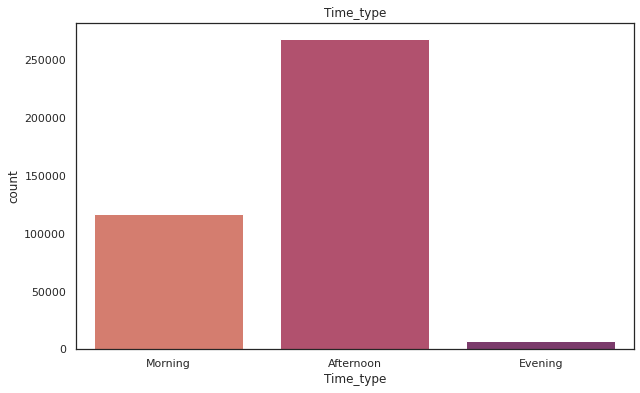

In [ ]:
# plotting count v/s time_type
plt.figure(figsize=(10,6))
plt.title('Time_type')
sns.countplot(x='Time_type',data=retail_df_copy,palette="flare")

# **RFM Analysis**

RFM (**Recency, Frequency, Monetary**) analysis is a customer segmentation technique that uses past purchase **behavior** to divide customers into groups. <br> RFM helps divide customers into various categories or clusters to identify customers who are more likely to respond to promotions and also for future personalization services.
- RECENCY (R): Days since last purchase 
- FREQUENCY (F): Total number of purchases 
- MONETARY VALUE (M): Total money this customer spent.

We will create those 3 customer attributes for each customer.

##**Creating Recency attributes**

In [ ]:
#last date available in our dataset
retail_df_copy['InvoiceDate'].max()

Timestamp('2011-12-09 12:50:00')

In [ ]:
import time, warnings
import datetime as dt

In [ ]:
now = dt.date(2011,12,9)
print(now)

2011-12-09


In [ ]:
#create a new column called date which contains the date of invoice only
retail_df_copy['date'] = retail_df_copy['InvoiceDate'].dt.date

In [ ]:
retail_df_copy.head()

InvoiceNo StockCode                          Description  Quantity  \
0    536365    85123A   WHITE HANGING HEART T-LIGHT HOLDER         6   
1    536365     71053                  WHITE METAL LANTERN         6   
2    536365    84406B       CREAM CUPID HEARTS COAT HANGER         8   
3    536365    84029G  KNITTED UNION FLAG HOT WATER BOTTLE         6   
4    536365    84029E       RED WOOLLY HOTTIE WHITE HEART.         6   

          InvoiceDate  UnitPrice  CustomerID         Country  total_cost  \
0 2010-12-01 08:26:00       2.55     17850.0  United Kingdom       15.30   
1 2010-12-01 08:26:00       3.39     17850.0  United Kingdom       20.34   
2 2010-12-01 08:26:00       2.75     17850.0  United Kingdom       22.00   
3 2010-12-01 08:26:00       3.39     17850.0  United Kingdom       20.34   
4 2010-12-01 08:26:00       3.39     17850.0  United Kingdom       20.34   

         Day  year  month_num  day_num  hour  minute     Month Time_type  \
0  Wednesday  2010         12        1     8      26  December   Morning   
1  Wednesday  2010         12        1     8      26  December   Morning   
2  Wednesday  2010         12        1     8      26  December   Morning   
3  Wednesday  2010         12        1     8      26  December   Morning   
4  Wednesday  2010         12        1     8      26  December   Morning   

         date  
0  2010-12-01  
1  2010-12-01  
2  2010-12-01  
3  2010-12-01  
4  2010-12-01

In [ ]:
#group by customers and check last date of purshase
recency_df = retail_df_copy.groupby(by='CustomerID', as_index=False)['date'].max()
recency_df.columns = ['CustomerID','LastPurshaceDate']
recency_df.head()

CustomerID LastPurshaceDate
0     12346.0       2011-01-18
1     12347.0       2011-12-07
2     12348.0       2011-09-25
3     12349.0       2011-11-21
4     12350.0       2011-02-02

In [ ]:
#calculate recency
recency_df['Recency'] = recency_df['LastPurshaceDate'].apply(lambda x: (now - x).days)

In [ ]:
recency_df.head(10)

CustomerID LastPurshaceDate  Recency
0     12346.0       2011-01-18      325
1     12347.0       2011-12-07        2
2     12348.0       2011-09-25       75
3     12349.0       2011-11-21       18
4     12350.0       2011-02-02      310
5     12352.0       2011-11-03       36
6     12353.0       2011-05-19      204
7     12354.0       2011-04-21      232
8     12355.0       2011-05-09      214
9     12356.0       2011-11-17       22

In [ ]:
#drop LastPurchaseDate as we don't need it anymore
recency_df.drop('LastPurshaceDate',axis=1,inplace=True)

##**Creating Frequency attributes**

In [ ]:
#calculate frequency of purchases
frequency_df = retail_df_copy.groupby(by=['CustomerID'], as_index=False)['InvoiceNo'].count()
frequency_df.columns = ['CustomerID','Frequency']
frequency_df.head(10)

CustomerID  Frequency
0     12346.0          1
1     12347.0        182
2     12348.0         31
3     12349.0         73
4     12350.0         17
5     12352.0         85
6     12353.0          4
7     12354.0         58
8     12355.0         13
9     12356.0         59

In [ ]:
#checking column names
retail_df_copy.columns

Index(['InvoiceNo', 'StockCode', 'Description', 'Quantity', 'InvoiceDate',
       'UnitPrice', 'CustomerID', 'Country', 'total_cost', 'Day', 'year',
       'month_num', 'day_num', 'hour', 'minute', 'Month', 'Time_type', 'date'],
      dtype='object')

##**Creating Monetary attributes**

In [ ]:
#calculate monetary for each customer
monetary_df = retail_df_copy.groupby(by='CustomerID',as_index=False).agg({'total_cost': lambda x: x.sum()})
monetary_df.columns = ['CustomerID','Monetary']
monetary_df.head()

CustomerID  Monetary
0     12346.0  77183.60
1     12347.0   4310.00
2     12348.0   1797.24
3     12349.0   1757.55
4     12350.0    334.40

In [ ]:
#merge recency dataframe with frequency dataframe
temp_df = recency_df.merge(frequency_df,on='CustomerID')
temp_df.head()

CustomerID  Recency  Frequency
0     12346.0      325          1
1     12347.0        2        182
2     12348.0       75         31
3     12349.0       18         73
4     12350.0      310         17

In [ ]:
#merge with monetary dataframe to get a table with the 3 columns
rfm_df = temp_df.merge(monetary_df,on='CustomerID')
#use CustomerID as index
rfm_df.set_index('CustomerID',inplace=True)
#check the head
rfm_df.head()

Recency  Frequency  Monetary
CustomerID                              
12346.0         325          1  77183.60
12347.0           2        182   4310.00
12348.0          75         31   1797.24
12349.0          18         73   1757.55
12350.0         310         17    334.40

In [ ]:
# Split into four segments using quantiles
quantiles = rfm_df.quantile(q=[0.25,0.5,0.75])
quantiles

Recency  Frequency   Monetary
0.25    17.00       17.0   306.4825
0.50    50.00       41.0   668.5700
0.75   141.75       98.0  1660.5975

In [ ]:
quantiles.to_dict()

{'Recency': {0.25: 17.0, 0.5: 50.0, 0.75: 141.75},
 'Frequency': {0.25: 17.0, 0.5: 41.0, 0.75: 98.0},
 'Monetary': {0.25: 306.48249999999996,
  0.5: 668.5700000000002,
  0.75: 1660.5974999999999}}

##**Making RFM table and calculating RFM score**

In [ ]:
def RScore(x,p,d):
    if x <= d[p][0.25]:
        return 4
    elif x <= d[p][0.50]:
        return 3
    elif x <= d[p][0.75]: 
        return 2
    else:
        return 1
# Arguments (x = value, p = recency, monetary_value, frequency, d = quartiles dict)
def FMScore(x,p,d):
    if x <= d[p][0.25]:
        return 1
    elif x <= d[p][0.50]:
        return 2
    elif x <= d[p][0.75]: 
        return 3
    else:
        return 4

In [ ]:
#create rfm segmentation table
rfm_segmentation = rfm_df
rfm_segmentation['R_Quartile'] = rfm_segmentation['Recency'].apply(RScore, args=('Recency',quantiles,))
rfm_segmentation['F_Quartile'] = rfm_segmentation['Frequency'].apply(FMScore, args=('Frequency',quantiles,))
rfm_segmentation['M_Quartile'] = rfm_segmentation['Monetary'].apply(FMScore, args=('Monetary',quantiles,))

In [ ]:
# checking head of RFM table
rfm_segmentation.head()

Recency  Frequency  Monetary  R_Quartile  F_Quartile  M_Quartile
CustomerID                                                                  
12346.0         325          1  77183.60           1           1           4
12347.0           2        182   4310.00           4           4           4
12348.0          75         31   1797.24           2           2           4
12349.0          18         73   1757.55           3           3           4
12350.0         310         17    334.40           1           1           2

In [ ]:
# Calculating RFM score
rfm_segmentation['RFMScore'] = rfm_segmentation.R_Quartile.map(str) \
                            + rfm_segmentation.F_Quartile.map(str) \
                            + rfm_segmentation.M_Quartile.map(str)
rfm_segmentation.head()

Recency  Frequency  Monetary  R_Quartile  F_Quartile  M_Quartile  \
CustomerID                                                                     
12346.0         325          1  77183.60           1           1           4   
12347.0           2        182   4310.00           4           4           4   
12348.0          75         31   1797.24           2           2           4   
12349.0          18         73   1757.55           3           3           4   
12350.0         310         17    334.40           1           1           2   

           RFMScore  
CustomerID           
12346.0         114  
12347.0         444  
12348.0         224  
12349.0         334  
12350.0         112

In [ ]:
# filtering records for customer with highest RFM score
rfm_segmentation[rfm_segmentation['RFMScore']=='444'].sort_values('Monetary', ascending=False).head(10)

Recency  Frequency   Monetary  R_Quartile  F_Quartile  M_Quartile  \
CustomerID                                                                      
14646.0           1       2076  280206.02           4           4           4   
18102.0           0        431  259657.30           4           4           4   
17450.0           8        336  194390.79           4           4           4   
14911.0           1       5670  143711.17           4           4           4   
14156.0           9       1395  117210.08           4           4           4   
17511.0           2        963   91062.38           4           4           4   
16684.0           4        277   66653.56           4           4           4   
14096.0           4       5111   65164.79           4           4           4   
13694.0           3        568   65039.62           4           4           4   
15311.0           0       2366   60632.75           4           4           4   

           RFMScore  
CustomerID           
14646.0         444  
18102.0         444  
17450.0         444  
14911.0         444  
14156.0         444  
17511.0         444  
16684.0         444  
14096.0         444  
13694.0         444  
15311.0         444

In [ ]:
# Categorising customer or making customer segmentation based on RFM Score
print("Best Customers: ",len(rfm_segmentation[rfm_segmentation['RFMScore']=='444']))
print('Loyal Customers: ',len(rfm_segmentation[rfm_segmentation['F_Quartile']==4]))
print("Big Spenders: ",len(rfm_segmentation[rfm_segmentation['M_Quartile']==4]))
print('Almost Lost: ', len(rfm_segmentation[rfm_segmentation['RFMScore']=='244']))
print('Lost Customers: ',len(rfm_segmentation[rfm_segmentation['RFMScore']=='144']))
print('Lost Cheap Customers: ',len(rfm_segmentation[rfm_segmentation['RFMScore']=='111']))

Best Customers:  443
Loyal Customers:  1080
Big Spenders:  1085
Almost Lost:  105
Lost Customers:  22
Lost Cheap Customers:  381


Now that we knew our customers segments we can choose how to target or deal with each segment.

For example:

**Best Customers - Champions**: Reward them. They can be early adopters to new products. Suggest them "Refer a friend".

**At Risk**: Send them personalized emails to encourage them to shop.

In [ ]:
rfm_data = rfm_df.drop(['R_Quartile','F_Quartile','M_Quartile','RFMScore'],axis=1)
rfm_data.head()

Recency  Frequency  Monetary
CustomerID                              
12346.0         325          1  77183.60
12347.0           2        182   4310.00
12348.0          75         31   1797.24
12349.0          18         73   1757.55
12350.0         310         17    334.40

##**Feature correlations**

In [ ]:
# Checking correlation between features
rfm_data.corr()

Recency  Frequency  Monetary
Recency    1.000000  -0.206501 -0.121975
Frequency -0.206501   1.000000  0.425282
Monetary  -0.121975   0.425282  1.000000

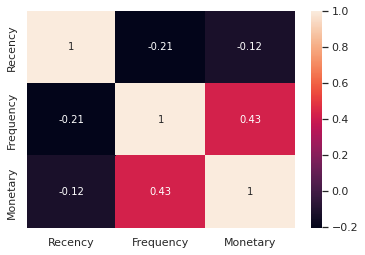

In [ ]:
# showing features correlations using heatmap
sns.heatmap(rfm_data.corr(),annot=True)

we have a negative correlation between:
- Recency and Frequency
- Recency and Monetary

The correlation between **Monetary and Frequency** is positive comparing to negative ones but still not that strong. 

##**Visualize feature distributions**

In order to get a better understanding of the dataset, we construct a scatter matrix of each of the three features/attributes/columns present in the RFM data. 

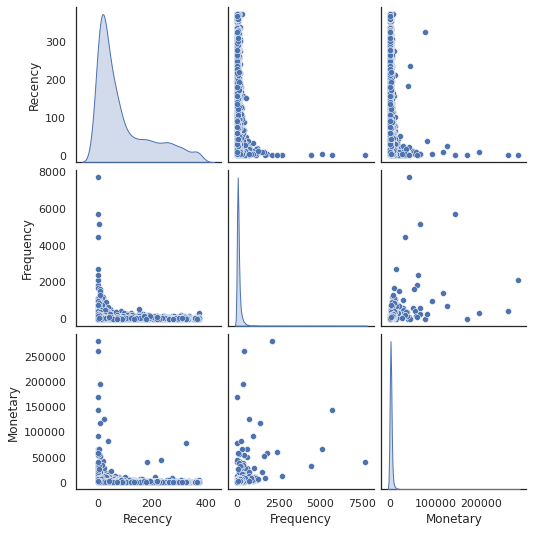

In [ ]:
# visualising features distribution
import seaborn as sns
sns.pairplot(rfm_data,diag_kind='kde')

In [ ]:
rfm_data.skew()

Recency       1.245826
Frequency    18.043530
Monetary     19.339368
dtype: float64

**Observation:** We can see that we have a **skewed distribution** of the 3 variables.

This indicates how normalization is required to make the data features normally distributed as **clustering** algorithms require them to be **normally distributed**.

##**Data Normalization**

In [ ]:
#log transformation
rfm_r_log = np.log(rfm_data['Recency']+0.1) #can't take log(0) and so add a small number
rfm_f_log = np.log(rfm_data['Frequency'])
rfm_m_log = np.log(rfm_data['Monetary']+0.1)

In [ ]:
log_data = pd.DataFrame({'Monetary': rfm_m_log,'Recency': rfm_r_log,'Frequency': rfm_f_log})

In [ ]:
# checking the head of dataset after log transformation
log_data.head()

Monetary   Recency  Frequency
CustomerID                                
12346.0     11.253944  5.784133   0.000000
12347.0      8.368716  0.741937   5.204007
12348.0      7.494063  4.318821   3.433987
12349.0      7.471733  2.895912   4.290459
12350.0      5.812637  5.736895   2.833213

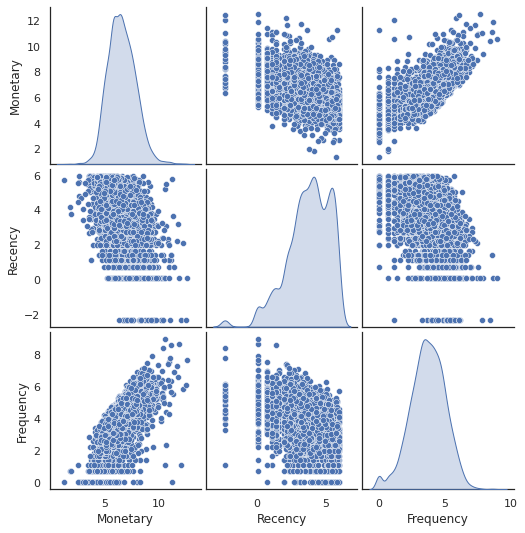

In [ ]:
# Produce a scatter matrix for each pair of features in the data
sns.pairplot(log_data,diag_kind='kde');

In [ ]:
log_data.skew()

Monetary     0.385332
Recency     -0.869633
Frequency   -0.217968
dtype: float64

The distributions of Frequency and Monetary are better, more normalized, but it's not the case with Recency Distribution, which is improved but not as much. 

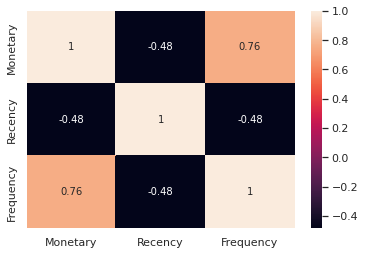

In [ ]:
# Features correlation after log transformation or data normalization
sns.heatmap(log_data.corr(),annot=True)

In [ ]:
# checking correlation between features
log_data.corr()

Monetary   Recency  Frequency
Monetary   1.000000 -0.483551   0.757412
Recency   -0.483551  1.000000  -0.479347
Frequency  0.757412 -0.479347   1.000000

Now, Monetary and Frequency are more strongly correlated.

In [ ]:
# Assigning normalized data to variablr X
X=log_data

#**Modelling**

##**1. K-means Implementation**

A common challenge with k-means is that we must tell it how many clusters we expect. Figuring out how many clusters we need is not obvious from data, thus we will try different clusters numbers and check their silhouette coefficient. The silhouette coefficient for a data point measures how similar it is to its assigned cluster from -1 (dissimilar) to 1 (similar). Silhouette score = (B-A)/max(B,A)

Where,

B is the mean distance to the points in the nearest cluster that the data point is not a part of. [it shows distinctness]

A is the mean intra-cluster distance to all the points in its own cluster. [It shows compactness]

The value of the silhouette score range lies between -1 to 1. Higher the Silhoette score, better the cluster quality.

Also, K-means is sensitive to initializations because those initializations are critical to quality of optima found. Thus, we will use smart initialization called ***k-means++***.

In [ ]:
# Importing Libraries
from sklearn.metrics import silhouette_score
from sklearn import preprocessing
from sklearn.datasets import make_blobs
from sklearn.cluster import KMeans
from sklearn.metrics import silhouette_samples, silhouette_score
import matplotlib.pyplot as plt
import matplotlib.cm as cm
import numpy as np

In [ ]:
feature_vector=['Recency','Frequency','Monetary']
X_features=log_data[feature_vector].values
scaler=preprocessing.StandardScaler()
X=scaler.fit_transform(X_features)

###**1.1 Silhouette_Score**

For n_clusters = 2 The average silhouette_score is : 0.3953403930258285
For n_clusters = 3 The average silhouette_score is : 0.30739300237166417
For n_clusters = 4 The average silhouette_score is : 0.296692844119798
For n_clusters = 5 The average silhouette_score is : 0.27662962135718927
For n_clusters = 6 The average silhouette_score is : 0.27612656172707994
For n_clusters = 7 The average silhouette_score is : 0.26818690058812417
For n_clusters = 8 The average silhouette_score is : 0.26344995256545956
For n_clusters = 9 The average silhouette_score is : 0.2510733552370449
For n_clusters = 10 The average silhouette_score is : 0.25854453310136377
For n_clusters = 11 The average silhouette_score is : 0.25678732389587644
For n_clusters = 12 The average silhouette_score is : 0.2528714608407747
For n_clusters = 13 The average silhouette_score is : 0.2593472568146424
For n_clusters = 14 The average silhouette_score is : 0.26222269621648125
For n_clusters = 15 The average silhouette_score is 

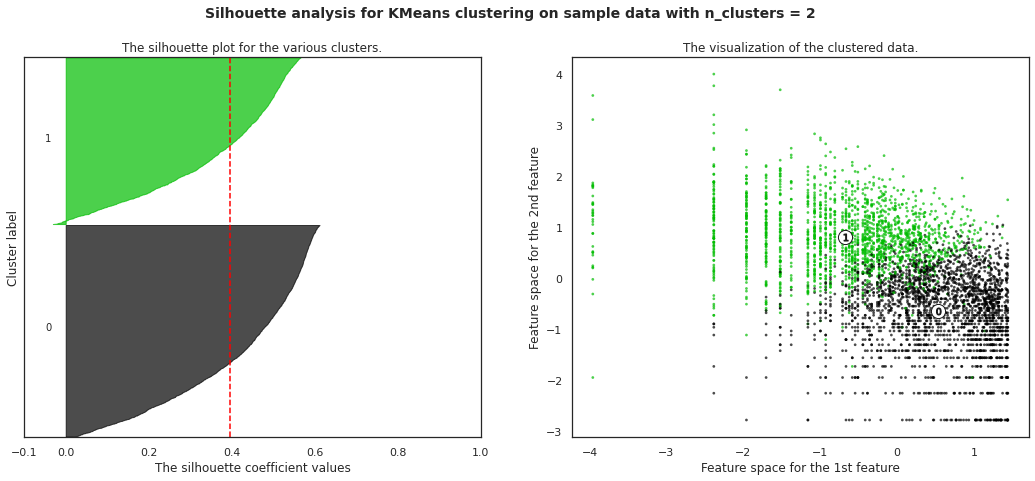

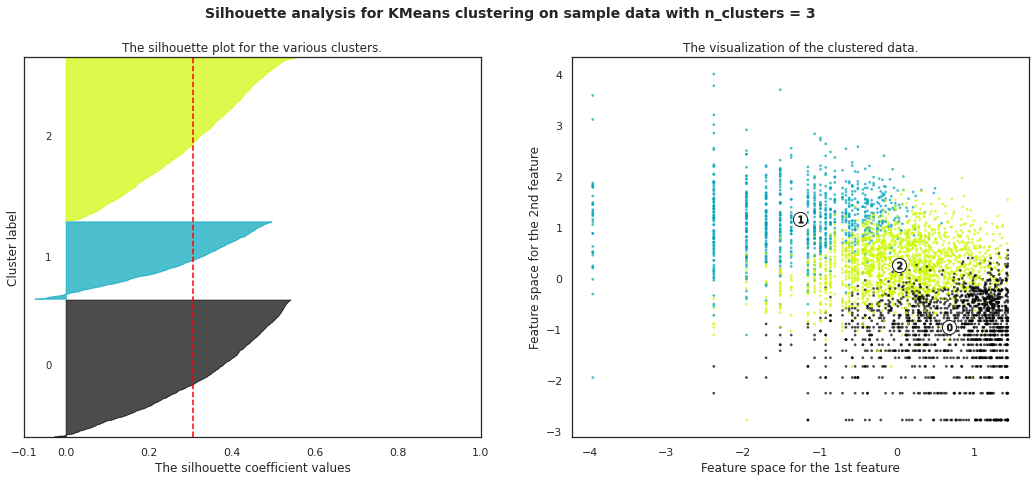

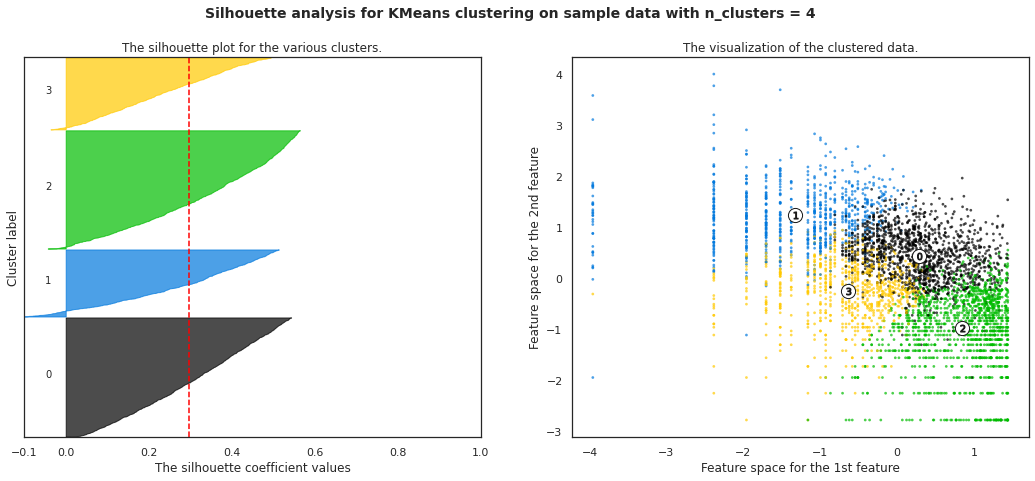

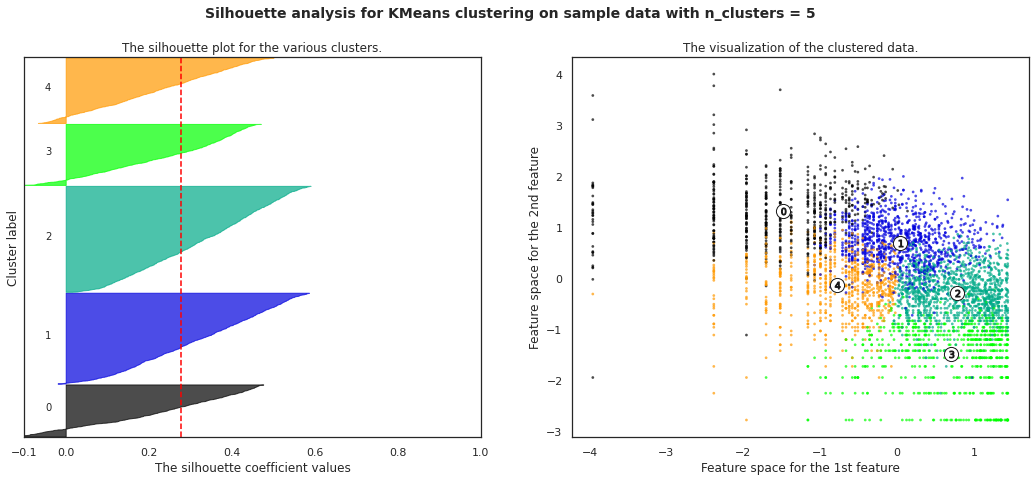

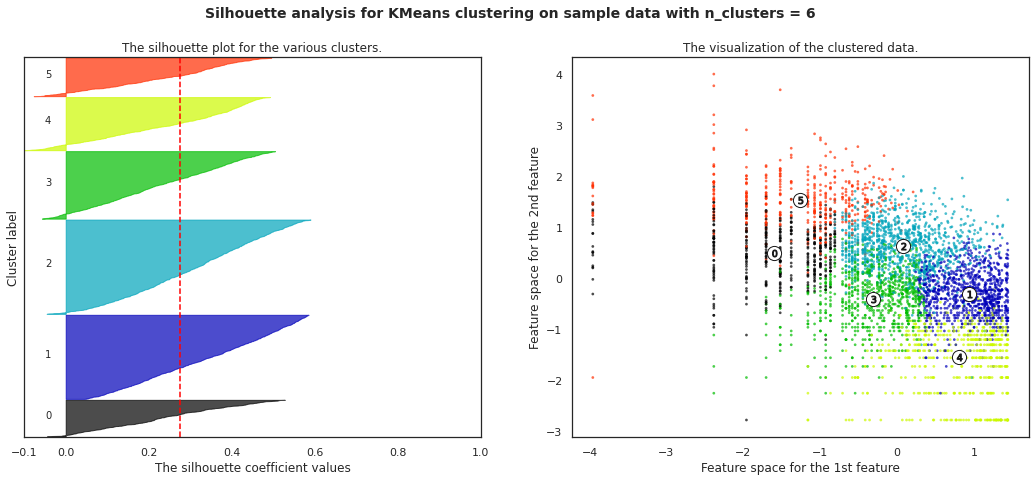

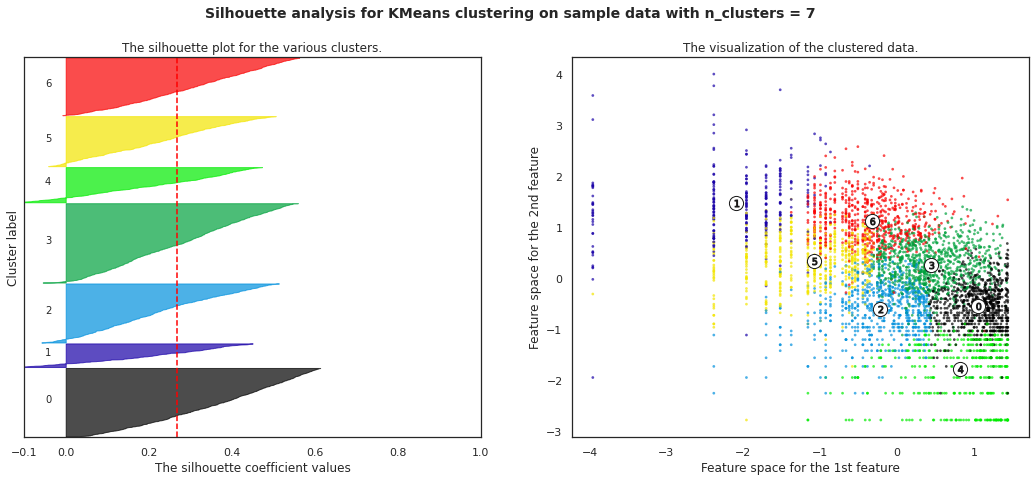

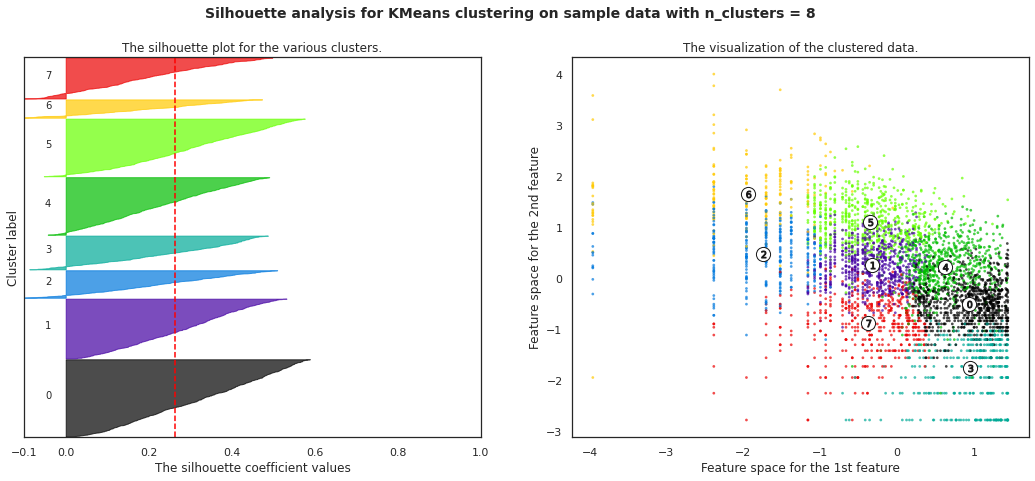

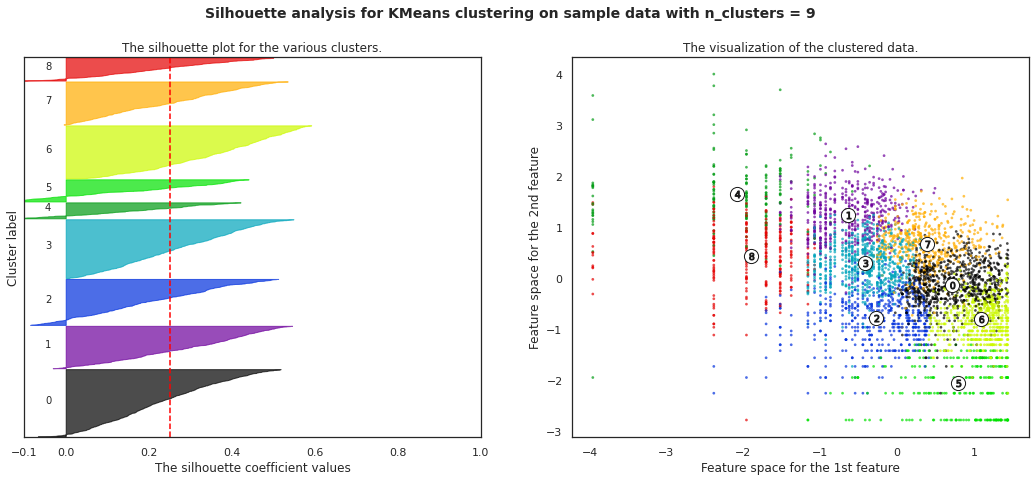

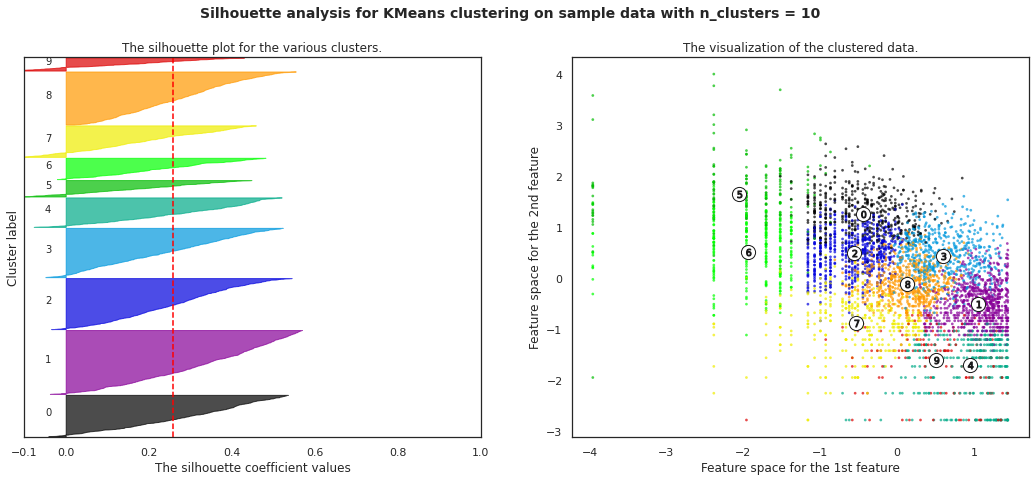

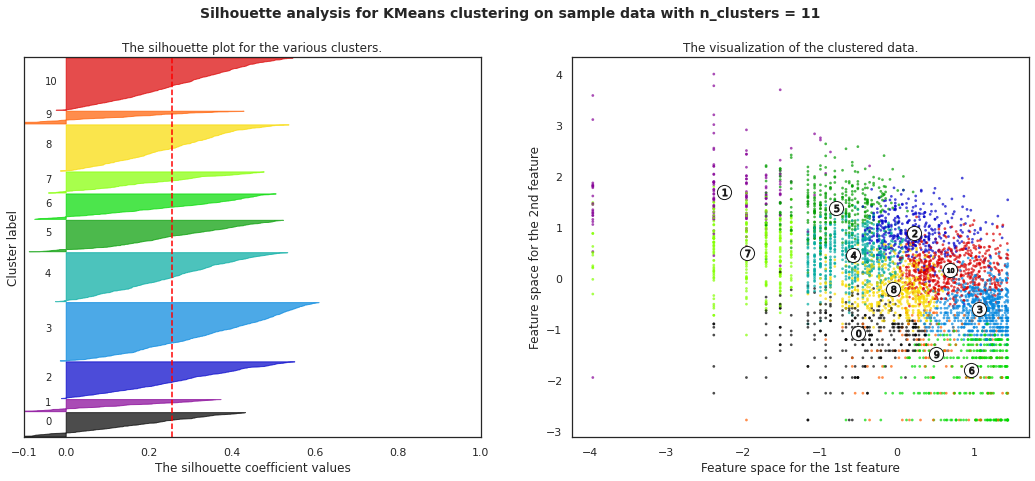

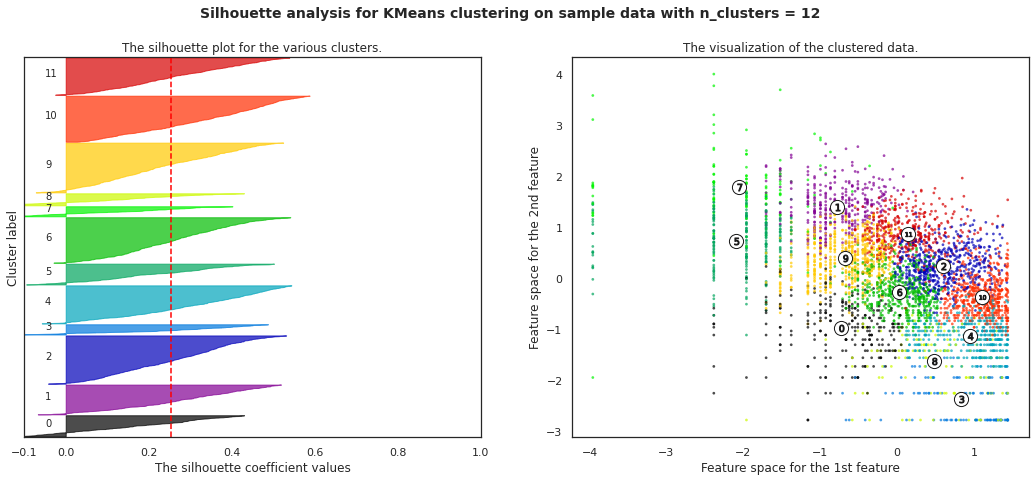

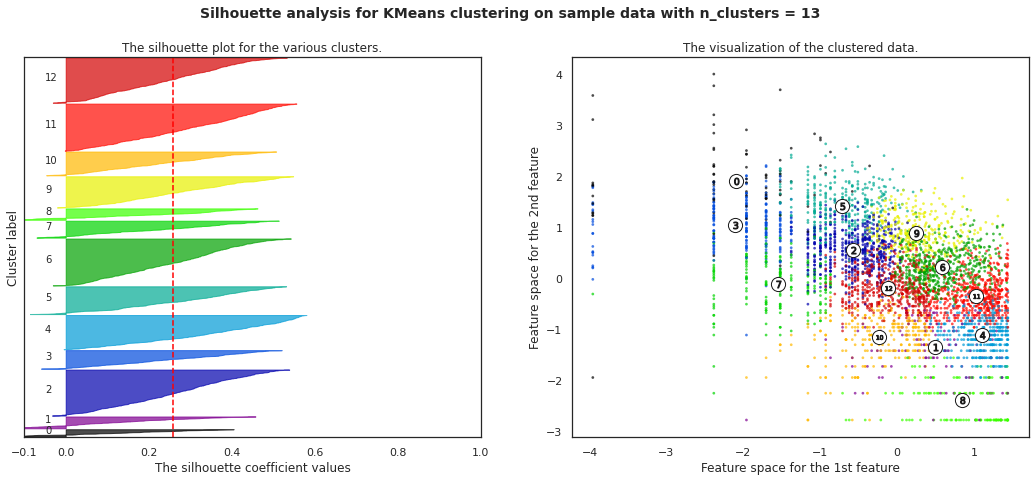

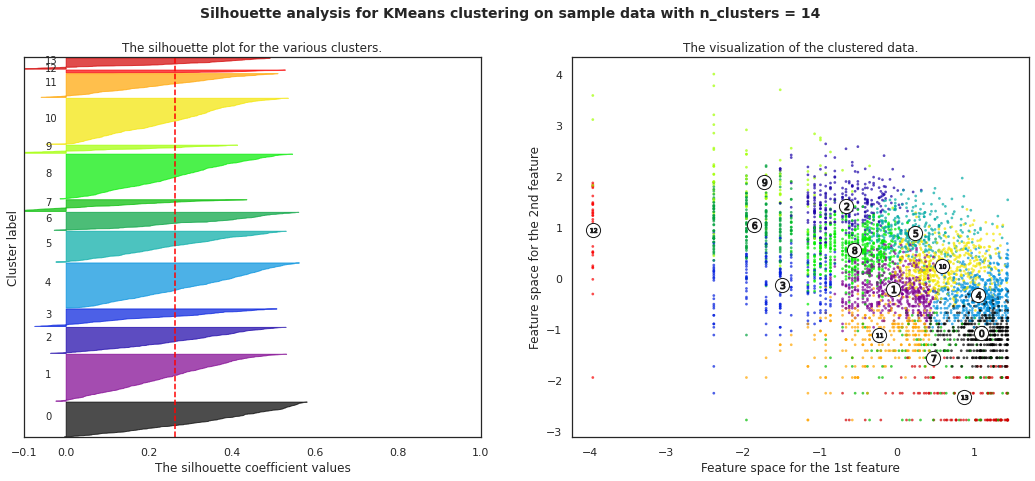

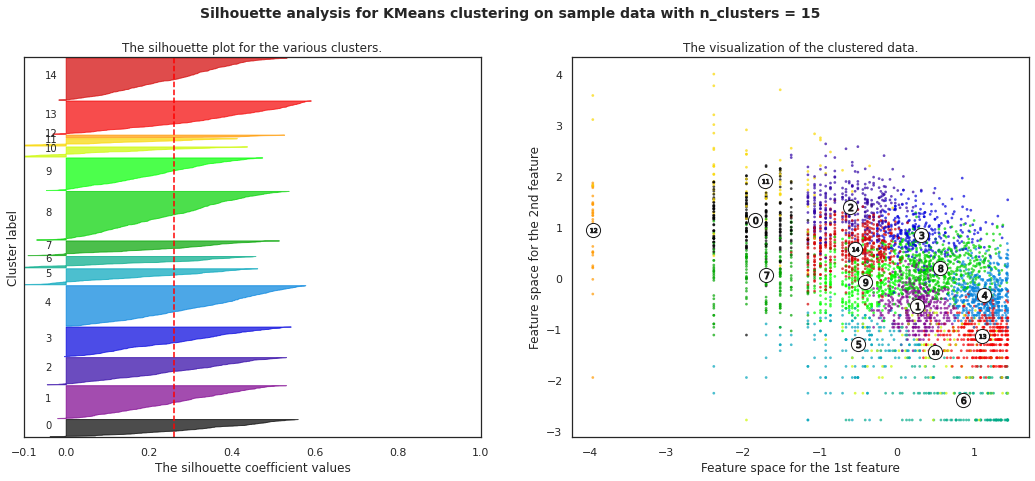

In [ ]:
range_n_clusters = [2,3,4,5,6,7,8,9,10,11,12,13,14,15]

for n_clusters in range_n_clusters:
    # Create a subplot with 1 row and 2 columns
    fig, (ax1, ax2) = plt.subplots(1, 2)
    fig.set_size_inches(18, 7)

    # The 1st subplot is the silhouette plot
    # The silhouette coefficient can range from -1, 1 but in this example all
    # lie within [-0.1, 1]
    ax1.set_xlim([-0.1, 1])
    # The (n_clusters+1)*10 is for inserting blank space between silhouette
    # plots of individual clusters, to demarcate them clearly.
    ax1.set_ylim([0, len(X) + (n_clusters + 1) * 10])

    # Initialize the clusterer with n_clusters value and a random generator
    # seed of 10 for reproducibility.
    clusterer = KMeans(n_clusters=n_clusters, random_state=10)
    cluster_labels = clusterer.fit_predict(X)

    # The silhouette_score gives the average value for all the samples.
    # This gives a perspective into the density and separation of the formed
    # clusters
    silhouette_avg = silhouette_score(X, cluster_labels)
    print("For n_clusters =", n_clusters,
          "The average silhouette_score is :", silhouette_avg)

    # Compute the silhouette scores for each sample
    sample_silhouette_values = silhouette_samples(X, cluster_labels)

    y_lower = 10
    for i in range(n_clusters):
        # Aggregate the silhouette scores for samples belonging to
        # cluster i, and sort them
        ith_cluster_silhouette_values = \
            sample_silhouette_values[cluster_labels == i]

        ith_cluster_silhouette_values.sort()
        size_cluster_i = ith_cluster_silhouette_values.shape[0]
        y_upper = y_lower + size_cluster_i

        color = cm.nipy_spectral(float(i) / n_clusters)
        ax1.fill_betweenx(np.arange(y_lower, y_upper),
                          0, ith_cluster_silhouette_values,
                          facecolor=color, edgecolor=color, alpha=0.7)

        # Label the silhouette plots with their cluster numbers at the middle
        ax1.text(-0.05, y_lower + 0.5 * size_cluster_i, str(i))

        # Compute the new y_lower for next plot
        y_lower = y_upper + 10  # 10 for the 0 samples

    ax1.set_title("The silhouette plot for the various clusters.")
    ax1.set_xlabel("The silhouette coefficient values")
    ax1.set_ylabel("Cluster label")

    # The vertical line for average silhouette score of all the values
    ax1.axvline(x=silhouette_avg, color="red", linestyle="--")

    ax1.set_yticks([])  # Clear the yaxis labels / ticks
    ax1.set_xticks([-0.1, 0, 0.2, 0.4, 0.6, 0.8, 1])

    # 2nd Plot showing the actual clusters formed
    colors = cm.nipy_spectral(cluster_labels.astype(float) /n_clusters)
    ax2.scatter(X[:, 0], X[:, 1], marker='.', s=30, lw=0, alpha=0.7,
                c=colors, edgecolor='k')

    # Labeling the clusters
    centers = clusterer.cluster_centers_
    # Draw white circles at cluster centers
    ax2.scatter(centers[:, 0], centers[:, 1], marker='o',
                c="white", alpha=1, s=200, edgecolor='k')

    for i, c in enumerate(centers):
        ax2.scatter(c[0], c[1], marker='$%d$' % i, alpha=1,
                    s=50, edgecolor='k')

    ax2.set_title("The visualization of the clustered data.")
    ax2.set_xlabel("Feature space for the 1st feature")
    ax2.set_ylabel("Feature space for the 2nd feature")
    plt.suptitle(("Silhouette analysis for KMeans clustering on sample data "
                  "with n_clusters = %d" % n_clusters),
                 fontsize=14, fontweight='bold')

plt.show()

In [ ]:
# no. of cluster and class instantiation
kmeans = KMeans(n_clusters=2)
# fitting the input data
kmeans.fit(X)
# getting the cluster labels
y_kmeans= kmeans.predict(X)

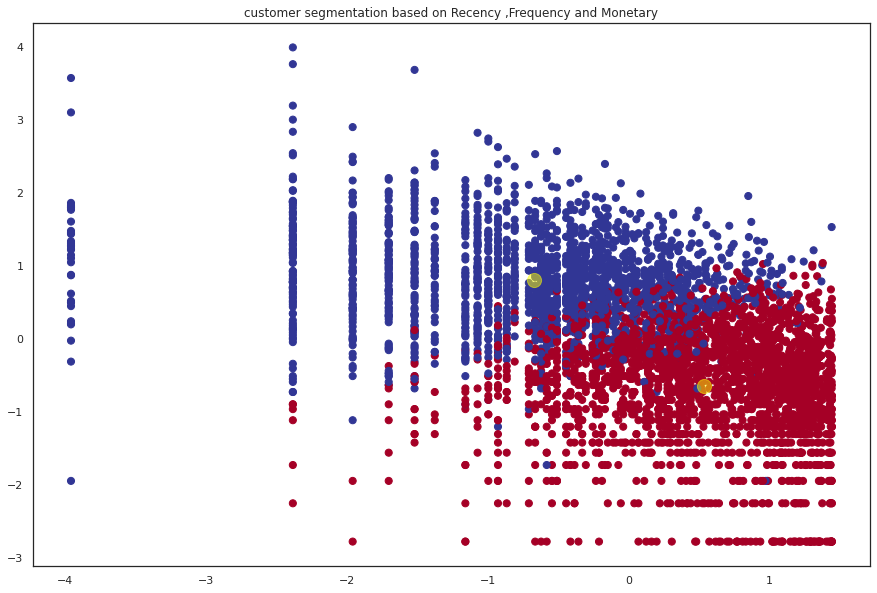

In [ ]:
# Visualization of customer segmentation based On RFM features
plt.figure(figsize=(15,10))
plt.title('customer segmentation based on Recency ,Frequency and Monetary')
plt.scatter(X[:, 0], X[:, 1], c=y_kmeans, s=50, cmap='RdYlBu')

centers = kmeans.cluster_centers_
plt.scatter(centers[:, 0], centers[:, 1], c='yellow', s=200, alpha=0.5)

###**1.2 Elbow method**

The elbow method is used to find the optimal number of clusters. The idea behind the elbow method is to identify the value of k where the distortion begins to increase most rapidly. If k increases, the distortion will decrease, because the samples will be closer to the centroids they are assigned to.

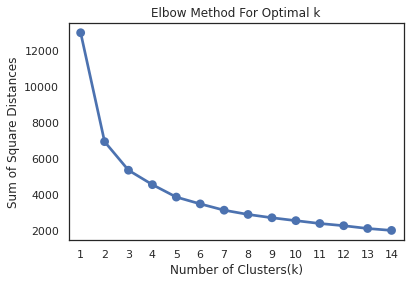

In [ ]:
# Elbow plot to find optimal number of cluster
sum_of_sq_dist = {}
for k in range(1,15):
    km = KMeans(n_clusters= k, init= 'k-means++', max_iter= 1000)
    km = km.fit(X)
    sum_of_sq_dist[k] = km.inertia_
    
#Plot the graph for the sum of square distance values and Number of Clusters
sns.pointplot(x = list(sum_of_sq_dist.keys()), y = list(sum_of_sq_dist.values()))
plt.xlabel('Number of Clusters(k)')
plt.ylabel('Sum of Square Distances')
plt.title('Elbow Method For Optimal k')
plt.show()

In [ ]:
#Perform K-Mean Clustering or build the K-Means clustering model
KMean_clust = KMeans(n_clusters= 2, init= 'k-means++', max_iter= 1000)
KMean_clust.fit(X)

#Find the clusters for the observation given in the dataset   
rfm_df['Cluster'] = KMean_clust.labels_
rfm_df.head(10)

Recency  Frequency  Monetary  R_Quartile  F_Quartile  M_Quartile  \
CustomerID                                                                     
12346.0         325          1  77183.60           1           1           4   
12347.0           2        182   4310.00           4           4           4   
12348.0          75         31   1797.24           2           2           4   
12349.0          18         73   1757.55           3           3           4   
12350.0         310         17    334.40           1           1           2   
12352.0          36         85   2506.04           3           3           4   
12353.0         204          4     89.00           1           1           1   
12354.0         232         58   1079.40           1           3           3   
12355.0         214         13    459.40           1           1           2   
12356.0          22         59   2811.43           3           3           4   

           RFMScore  Cluster  
CustomerID                    
12346.0         114        1  
12347.0         444        0  
12348.0         224        1  
12349.0         334        0  
12350.0         112        1  
12352.0         334        0  
12353.0         111        1  
12354.0         133        1  
12355.0         112        1  
12356.0         334        0

##**2. Agglomerative Hierarchial Clustering**

**Agglomerative Clustering** is also known as bottom-up approach.
In this approach we take all data points as clusters and start merging it based on the distance between clusters. This will be done until we form one big cluster.

In [ ]:
# importing library
from sklearn.cluster import AgglomerativeClustering

In [ ]:
# class instantiation
model2 = AgglomerativeClustering(n_clusters=2, affinity='euclidean',  linkage='ward')

In [ ]:
# fitting the input data
model2.fit(X)

AgglomerativeClustering()

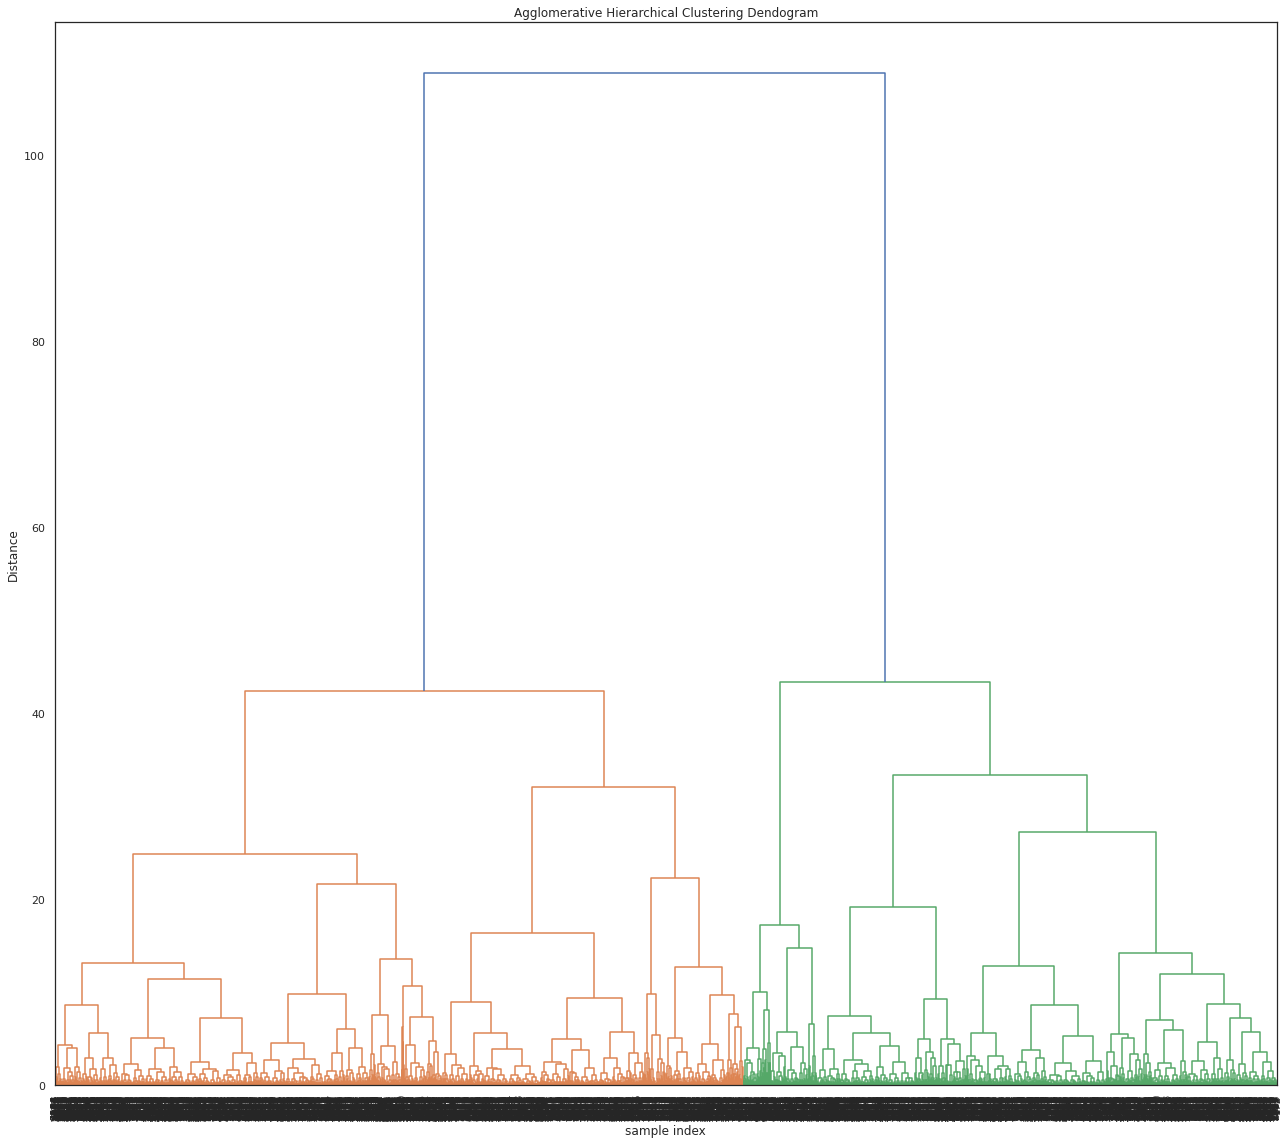

In [ ]:
# plotting Dendogram for agglomerative approach of Hierarchial clustering
from scipy.cluster.hierarchy import dendrogram, linkage
from scipy.spatial.distance import pdist
plt.figure(figsize=(18, 16))
plt.title('Agglomerative Hierarchical Clustering Dendogram')
plt.xlabel('sample index')
plt.ylabel('Distance')
Z = linkage(X, 'ward')
dendrogram(Z,leaf_rotation=90.0,p=25,color_threshold=80,leaf_font_size=10,truncate_mode='level')
plt.tight_layout()

##**3. DBSCAN (Density-based spatial clustering of application with noise)**

**DBSCAN** is the most productive kind of unsupervised machine learning algorithms. These algorithms are based on the intuitive notion of “clusters” and “noise”. The key idea is that for each point of a cluster, the neighborhood of a given radius has to contain at least a minimum number of points. 

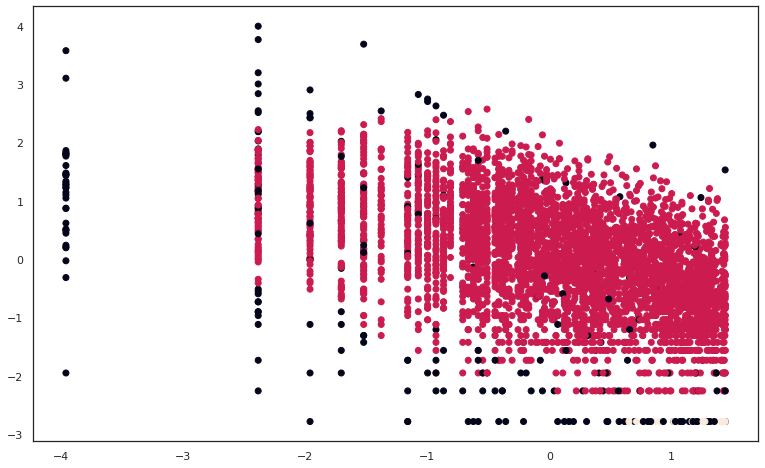

In [ ]:
from sklearn.cluster import DBSCAN # importing library
from sklearn import metrics
y_pred = DBSCAN(eps=0.5, min_samples=15).fit_predict(X) # class instantiation, fitting input data and making cluster prediction. 
plt.figure(figsize=(13,8))
plt.scatter(X[:,0], X[:,1], c=y_pred)

# **Summary Table**

In [ ]:
from prettytable import PrettyTable 
  
# Specify the Column Names while initializing the Table 
myTable = PrettyTable(['SL No.',"Model_Name",'Data', "Optimal_Number_of_cluster"]) 
  
# Add rows  
myTable.add_row(['1',"K-Means with silhouette_score ", "RFM", "2"]) 
myTable.add_row(['2',"K-Means with Elbow methos  ", "RFM", "2"])
myTable.add_row(['3',"Hierarchical clustering  ", "RFM", "2"])
myTable.add_row(['4',"DBSCAN ", "RFM", "3"])
print(myTable)

+--------+--------------------------------+------+---------------------------+
| SL No. |           Model_Name           | Data | Optimal_Number_of_cluster |
+--------+--------------------------------+------+---------------------------+
|   1    | K-Means with silhouette_score  | RFM  |             2             |
|   2    |  K-Means with Elbow methos     | RFM  |             2             |
|   3    |   Hierarchical clustering      | RFM  |             2             |
|   4    |            DBSCAN              | RFM  |             3             |
+--------+--------------------------------+------+---------------------------+


# **Conclusion**

## **A. EDA** 

* Our data possessed with null values in Customer_Id means there are no information available about their customer IDs. So, keeping them in the dataset would make no sense while applying clusterring. Along with some duplicates values were also removed. 
* In Exploratory data analysis we find out different insights like:- 
    * Top **Customer IDs**: **17841.0, 14911.0, 14096.0, 12748.0, 14606.0** </br>
    * Top **Five Countries**: **Uniter Kingdom(88.95%)**, Germany(2.33%), France(1.84%), Ireland(1.84%) and Spain(0.62%). </br>
    * Top **Five products** purchasing on the basis of frequency(How frequent customers are willing to bought these products): </br>
    WHITE HANGING HEART T-LIGHT HOLDER, </br>
    REGENCY CAKESTAND 3 TIER, </br>
    JUMBO BAG RED RETROSPOT, </br>
    PARTY BUNTING and </br>
    ASSORTED COLOUR BIRD ORNAMENT. </br>
    * Top **stock code** on the basis of count values: **85123A, 22423, 85099B, 47566 and 84879**. </br> 

* We did some **feature engineering** like creating new columns with **InvoiceDate** for e.g.,**Year, Month, Day, Hour, Month_Num and Day_Num**. **Total Amount** also calculated using features product between unit price and quantity. </br>
* Which **Year** produced **maximum business**: **2011** </br>
* **Month** which give **maximum business**: **November, October, December, September and May**. </br>
* **Maximum purchasing** on different **days**: **Thursday > Wednesday > Tuesday > Monday > Saturday > Friday**. </b> 
* Most of the customers usually purchase products in between **10:00 A.M to 2:00 P.M**. </br>
* Top **time duration of a day** for purchasing: **Afternoon > Morning > Evening**.</br> 


## **B. Algorithm**

RFM(Recency, Frequency and Monetary) dataframe ease our problem to solve in a particular order, it makes easy to recommend and display new launched products to few customers. </br>

We applied different clustering algorithms on our given dataset:</br>

**Clustering on Recency, Frequency & Monetary (RFM)** - {No. of Clusters - 2} </br>
   * K-Means with Silhouette_score </br>
   * K-Means with Elbow Method </br>
   * Hierarchical Clustering </br>
   * DBSCAN </br>


**Thank You !!!**